# **Import libraries**

In [ ]:
!wget http://lfs.aminer.cn/misc/moocdata/data/prediction_data.tar.gz

In [ ]:
!wget http://lfs.aminer.cn/misc/moocdata/data/course_info.csv

In [ ]:
# importing the "tarfile" module
import tarfile

# open file
file = tarfile.open('prediction_data.tar.gz')

# extracting file
file.extractall('./data')

file.close()

In [ ]:
# # This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# # Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


In [ ]:
!pip install seaborn

In [ ]:
!pip install xgboost

In [ ]:
!pip install imblearn

In [ ]:
!pip install retry-decorator

In [ ]:
!pip install category_encoders

In [ ]:
!pip install yellowbrick

In [1]:
### GPU ACCELERATED-LIBRARIES

import cudf as cf
import cuml as cl
import cupy as cp

from cuml.model_selection import train_test_split as cl_train_test_split, GridSearchCV as cl_GridSearchCV
from cuml.preprocessing import StandardScaler as cl_StandardScaler, MinMaxScaler as cl_MinMaxScaler

# base learners: SVM KNN NB XGBOOST Logreg RF
from cuml.svm import LinearSVC as cl_LinearSVC, SVC as cl_SVC
from cuml.neighbors import KNeighborsClassifier as cl_KNeighborsClassifier
from cuml.naive_bayes import GaussianNB as cl_GaussianNB
from cuml import LogisticRegression as cl_LogisticRegression
from cuml.ensemble import RandomForestClassifier as cl_RandomForestClassifier
from xgboost import XGBClassifier # xgboost library supports both GPU & CPU implementation
import xgboost

# clustering using KMeans
from cuml.cluster import KMeans as cl_KMeans

In [6]:
### CPU-BASED LIBRARIES

import pandas as pd
import numpy as np

# >> BASE LEARNERS: SVM KNN NB XGBOOST Logreg RF
from sklearn.svm import SVC as sk_SVC, LinearSVC as sk_LinearSVC, NuSVC as sk_NuSVC
from sklearn.pipeline import Pipeline, make_pipeline # for LinearSVC
from sklearn.calibration import CalibratedClassifierCV # for LinearSVC
from sklearn.neighbors import KNeighborsClassifier as sk_KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as sk_GaussianNB
from sklearn.ensemble import RandomForestClassifier as sk_RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression

# CLUSTERING using KMeans
from sklearn.cluster import KMeans as sk_KMeans


# >> EVALUATION METRICS:
from sklearn import metrics
from sklearn.metrics import log_loss, f1_score, roc_auc_score, silhouette_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# >> DATA PREPROCESSING:

# Train Test Split, Cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_predict

# Categorical Encoding
# from category_encoders import CountEncoder
from sklearn.preprocessing import LabelEncoder

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Feature Selection using RFECV
# from sklearn.feature_selection import RFECV
# from yellowbrick.model_selection import rfecv


# >> DATA VISUALIZATION LIBRARIES:
import matplotlib.pyplot as plt
import seaborn as sns


# >> FUNCTION OPTIMIZATION LIBRARIES:
from scipy import stats, optimize


# >> DATA BALANCER LIBRARIES:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [7]:
# MISCELLANEOUS LIBRARIES
from collections import Counter # to count objects/values in a set of collection
import time, datetime # to get Execution Time
import pickle # to save model
from retry_decorator import * # to retry code execution several times if error occured
import copy # to copy object

In [8]:
### DISTRIBUTED COMPUTING LIBRARIES (GPU/CPU)
import dask.dataframe as df
from dask.distributed import LocalCluster, Client
from dask import distributed as dd
import joblib
from dask_cuda import LocalCUDACluster

In [9]:
pd.set_option('display.max_columns',None) # to see all columns in a dataframe

In [10]:
sns.set(font='DejaVu Sans')

# **Checking environment**

In [11]:
import platform
print(platform.platform())
# Linux-5.4.0-89-generic-x86_64-with-glibc2.35

Linux-5.4.0-149-generic-x86_64-with-glibc2.31


In [14]:
# example getting the number of available cpu cores
from os import sched_getaffinity
# get the number of available logical cpu cores
len(sched_getaffinity(0))

12

In [15]:
from cpuinfo import *
[cpuinfo.cpu.info[i]['cpu MHz'] for i in range(len(sched_getaffinity(0)))]

['3387.744',
 '2473.302',
 '2515.814',
 '3388.132',
 '2961.540',
 '3394.563',
 '3401.072',
 '3401.088',
 '3397.461',
 '3405.425',
 '3388.700',
 '3405.110']

In [16]:
!nvidia-smi

Tue Jul 11 12:34:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.236.01   Driver Version: 450.236.01   CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      On   | 00000000:4E:00.0 Off |                   On |
| N/A   29C    P0    49W / 400W |                  N/A |     N/A      Default |
|                               |                      |              Enabled |
+-------------------------------+----------------------+----------------------+

+-----------------------------------------------------------------------------+
| MIG d

# **Loading data**

In [17]:
### lOADING DATA USING: GPU
start_time = datetime.datetime.now()

part1_log = cf.read_csv('data/prediction_log/train_log.csv')
part2_log = cf.read_csv('data/prediction_log/test_log.csv')

part1_dropout = cf.read_csv('data/prediction_log/train_truth.csv')
part2_dropout = cf.read_csv('data/prediction_log/test_truth.csv')

print('---DATA SUCCESSFULLY LOADED USING *GPU* IN %s---' % (datetime.datetime.now()-start_time))

---DATA SUCCESSFULLY LOADED USING *GPU* IN 0:00:09.419923---


In [18]:
%%time
course_info = cf.read_csv('course_info.csv')

CPU times: user 6.55 ms, sys: 0 ns, total: 6.55 ms
Wall time: 5.77 ms


In [19]:
le = LabelEncoder()
course_info['course_id'] = le.fit_transform(course_info['course_id'].to_pandas())
course_info.drop(columns=['id'], inplace=True)
course_info.rename(columns={'type':'course_type',
                            'category':'course_category',
                            'start':'course_start_date',
                            'end':'course_end_date'}, inplace=True)
course_info = course_info[['course_id','course_type','course_category','course_start_date','course_end_date']]
course_info

,course_id,course_type,course_category,course_start_date,course_end_date
0,831,0,<NA>,2016-11-16 08:00:00,2016-12-31 23:30:00
1,2746,0,<NA>,2016-09-01 00:00:00,2017-02-28 00:00:00
2,5118,0,<NA>,2018-01-01 08:00:00,2020-01-01 00:00:00
3,5825,0,<NA>,2017-03-01 18:30:00,2017-07-01 23:30:00
4,37,0,<NA>,2014-09-10 08:00:00,2015-09-10 00:00:00
...,...,...,...,...,...
6405,2422,0,<NA>,2017-04-10 00:00:00,2017-05-21 23:59:00
6406,3001,0,<NA>,2017-05-01 08:00:00,2017-05-31 00:00:00
6407,5798,0,<NA>,2015-12-07 00:00:00,2016-12-07 00:00:00
6408,4032,1,philosophy,2016-08-25 08:00:00,<NA>


In [20]:
log = cf.concat([part1_log, part2_log], axis=0, ignore_index=True)
del part1_log, part2_log
log['course_id'] = le.transform(log['course_id'].to_pandas())
log.drop(columns=['object'],inplace=True)
log

,enroll_id,username,course_id,session_id,action,time
0,772,5981,4095,d8a9b787fa69063c34c73b9c29190b1c,click_about,2015-09-27T15:42:59
1,772,5981,4095,d8a9b787fa69063c34c73b9c29190b1c,click_info,2015-09-27T15:43:12
2,773,1544995,4095,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,2015-10-19T19:37:42
3,773,1544995,4095,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,2015-10-19T19:33:27
4,773,1544995,4095,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,2015-10-19T19:33:30
...,...,...,...,...,...,...
42110397,466785,2513464,4227,b12bc83e13cd943cf61bf78f09c72158,problem_check_incorrect,2016-03-19T21:37:15
42110398,466785,2513464,4227,b12bc83e13cd943cf61bf78f09c72158,problem_check_incorrect,2016-03-19T21:37:22
42110399,466785,2513464,4227,b12bc83e13cd943cf61bf78f09c72158,problem_check_correct,2016-03-19T21:37:37
42110400,466785,2513464,4227,7eca0904ae14dc8af809c0362632dd8e,click_courseware,2016-03-19T19:24:44


In [21]:
dropout = cf.concat([part1_dropout, part2_dropout], axis=0, ignore_index=True)
del part1_dropout, part2_dropout
dropout

,enroll_id,truth
0,772,1
1,773,1
2,774,1
3,776,0
4,777,1
...,...,...
225637,466770,1
225638,466775,1
225639,466777,0
225640,466783,1


In [22]:
student_info = (
    log.groupby(['enroll_id','username','course_id']).count().reset_index()[['enroll_id','username','course_id']]
    .merge(course_info, on='course_id', how='left')
    .merge(dropout, on='enroll_id', how='left')
)

student_info['course_type'] = student_info['course_type'].map({0:'instructor-paced',1:'student-paced'})
student_info.rename(columns={'truth':'dropout'}, inplace=True)
student_info.sort_values('enroll_id')

,enroll_id,username,course_id,course_type,course_category,course_start_date,course_end_date,dropout
95609,772,5981,4095,instructor-paced,art,2015-09-25 08:00:00,2016-01-06 08:00:00,1
152549,773,1544995,4095,instructor-paced,art,2015-09-25 08:00:00,2016-01-06 08:00:00,1
78684,774,1072798,4095,instructor-paced,art,2015-09-25 08:00:00,2016-01-06 08:00:00,1
209132,775,1520977,4095,instructor-paced,art,2015-09-25 08:00:00,2016-01-06 08:00:00,1
206485,776,561867,4095,instructor-paced,art,2015-09-25 08:00:00,2016-01-06 08:00:00,0
...,...,...,...,...,...,...,...,...
168214,466781,2830711,4227,instructor-paced,chemistry,2016-03-01 08:00:00,2016-06-29 00:00:00,1
224159,466782,2680742,4227,instructor-paced,chemistry,2016-03-01 08:00:00,2016-06-29 00:00:00,1
167718,466783,2665176,4227,instructor-paced,chemistry,2016-03-01 08:00:00,2016-06-29 00:00:00,1
84357,466785,2513464,4227,instructor-paced,chemistry,2016-03-01 08:00:00,2016-06-29 00:00:00,1


In [23]:
print(f'Log: {len(log)} rows\nStudent Info: {len(student_info)} rows')

Log: 42110402 rows
Student Info: 225642 rows


In [24]:
print('Info of LOG table:\n')
print(log.info())
print('------------------------------------------------\n')
print('Info of STUDENT INFO table:\n')
print(student_info.info())

Info of LOG table:

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 42110402 entries, 0 to 42110401
Data columns (total 6 columns):
 #   Column      Dtype
---  ------      -----
 0   enroll_id   int64
 1   username    int64
 2   course_id   int64
 3   session_id  object
 4   action      object
 5   time        object
dtypes: int64(3), object(3)
memory usage: 3.9+ GB
None
------------------------------------------------

Info of STUDENT INFO table:

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 225642 entries, 0 to 225641
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   enroll_id          225642 non-null  int64
 1   username           225642 non-null  int64
 2   course_id          225642 non-null  int64
 3   course_type        225642 non-null  object
 4   course_category    224769 non-null  object
 5   course_start_date  225642 non-null  object
 6   course_end_date    225642 non-null  object
 7  

In [25]:
print('NULL values in LOG table:\n')
print(log.isna().sum())
print('------------------------------------------------\n')
print('NULL values in STUDENT INFO table:\n')
print(student_info.isna().sum())

NULL values in LOG table:

enroll_id     0
username      0
course_id     0
session_id    0
action        0
time          0
dtype: int64
------------------------------------------------

NULL values in STUDENT INFO table:

enroll_id              0
username               0
course_id              0
course_type            0
course_category      873
course_start_date      0
course_end_date        0
dropout                0
dtype: int64


In [26]:
print('Unique *enroll_id* in Log:',len(log.enroll_id.unique()))
print('Unique *username* in Log:',len(log.username.unique()))

Unique *enroll_id* in Log: 225642
Unique *username* in Log: 77083


In [27]:
print('Unique *dropout* (dropout classes) in STUDENT INFO table:\n')
print(student_info['dropout'].value_counts())
print()
print(student_info['dropout'].value_counts(normalize=True))

Unique *dropout* (dropout classes) in STUDENT INFO table:

1    171133
0     54509
Name: dropout, dtype: int32

1    0.758427
0    0.241573
Name: dropout, dtype: float32


In [28]:
log.describe(include='all').iloc[:3,2:]

/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/cudf/core/series.py:3133: FutureWarning: `datetime_is_numeric` is deprecated and will be removed in a future release. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(


,course_id,session_id,action,time
count,42110402.0,42110402,42110402,42110402
unique,<NA>,392290,22,14674208
top,<NA>,2ae99866521f8e79606fd69fe883f453,stop_video,2015-09-27T22:54:54


In [29]:
print('Types of *action* (recorded clickstream activity) are listed below.')
log.action.unique()

Types of *action* (recorded clickstream activity) are listed below.


0                 click_about
1                  click_info
2                 pause_video
3                  load_video
4                  play_video
5                  seek_video
6            click_courseware
7            close_courseware
8                  stop_video
9              click_progress
10                click_forum
11              create_thread
12             create_comment
13                problem_get
14              delete_thread
15              problem_check
16      problem_check_correct
17    problem_check_incorrect
18               problem_save
19             delete_comment
20              reset_problem
21                close_forum
Name: action, dtype: object

In [30]:
print('Unique *Course Categories* :',len(student_info.course_category.unique()),'\n')
print('Unique *Course Type* :',len(student_info.course_type.unique()))
print('The *Course Type* is', student_info.course_type.value_counts().index[0], '(instructor-paced mode)')

Unique *Course Categories* : 18 

Unique *Course Type* : 1
The *Course Type* is instructor-paced (instructor-paced mode)


In [31]:
student_info.course_category.value_counts(dropna=False)

computer            36933
business            30177
philosophy          29263
foreign language    22805
social science      19428
economics           16815
math                14031
art                 11394
history             10274
engineering          9295
literature           9278
medicine             4317
electrical           3845
physics              2670
biology              2132
chemistry            1747
<NA>                  873
education             365
Name: course_category, dtype: int32

In [32]:
student_info['course_category'].fillna('Uncategorized', inplace=True)

# **Preprocessing data**

## Feature engineering

In [33]:
from feature_engineering_xuetangx import *

In [34]:
session_duration,  session_activity_counts_fulldim, session_activity_counts, session_duration_activity, session_weekly_activity, studentactivity_weightedavg = feature_engineering_xuetangx(log, student_info)

Feature Engineering ....



/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/cudf/core/reshape.py:706: FutureWarning: Default `dtype` value will be changed to 'bool' in a future release, please update `dtype='bool'` to adapt for future behavior.
  warnings.warn(


---DONE in 0:04:38.790283--- 



In [35]:
session_duration

,enroll_id,session_id,time_max,time_min,duration
0,120523,19e5180882edc4389abc87e43706fd7f,2015-10-23 18:03:37,2015-10-21 17:33:39,174598.0
1,86608,c813fe59b54de148cdcf25309d074b7b,2016-06-28 21:17:46,2016-06-28 21:04:26,800.0
2,437137,5251b253d8ca3a6ba670c68b89ab0fb1,2016-03-13 02:05:46,2016-03-13 02:02:11,215.0
3,421806,5c238fdb47312d9e5404881f6894cc3a,2016-04-24 21:53:38,2016-04-24 20:29:16,5062.0
4,331036,dac37fe9ba0e2d9b1e3d8c671b5d06e7,2016-10-05 13:44:17,2016-10-05 13:43:59,18.0
...,...,...,...,...,...
513909,316031,283989eb649753ec254bac23e12d441c,2016-03-16 20:14:16,2016-03-16 20:06:43,453.0
513910,239547,ef074569744d02b5be265fbb5d0d9315,2016-07-14 13:35:24,2016-07-09 14:23:15,429129.0
513911,241411,b4771a12b7a4d46e63151035354203fa,2015-07-09 12:00:07,2015-07-09 11:59:27,40.0
513912,84099,0daff2f9ae69ae9596e94ba7247269de,2016-06-28 19:37:39,2016-06-27 11:48:55,114524.0


In [36]:
session_activity_counts_fulldim

,enroll_id,session_id,course_id,click_about,click_courseware,click_forum,click_info,click_progress,close_courseware,close_forum,create_comment,create_thread,delete_comment,delete_thread,load_video,pause_video,play_video,problem_check,problem_check_correct,problem_check_incorrect,problem_get,problem_save,reset_problem,seek_video,stop_video
0,75167,c6303ab52ce352c5c4309fb098b17c1d,73568,2,2,0,2,0,1,0,0,0,0,0,2,3,1,0,0,0,0,0,0,6,0
1,278493,69761e44c306f1997003956140f4e53f,3456,0,0,0,0,0,11,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,1
2,59554,5ee7a917c2e041c0b1c90d5a5ce5b407,31626,0,2,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3455,c894c41db3e42e65f56ccfd99bcab77e,3955728,20,123,16,23,0,56,0,0,0,0,0,39,124,148,71,30,41,63,3,0,163,56
4,281793,040d5aaf09b61516bfb570754cfbcdb2,72437,2,4,0,2,2,0,0,0,0,0,0,2,3,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513909,12117,73596cb930bcfdae5226c2ef0499e8dc,889720,0,12,1,5,0,10,0,0,0,0,0,31,52,62,16,14,2,15,0,0,6,10
513910,26680,2448b365c37c8b9eea08b339a5572222,218713,3,22,2,2,2,1,0,0,0,0,0,8,10,6,0,0,0,0,0,0,3,0
513911,76745,3772558ee53f21a10e46272cb91400c3,860871,2,18,6,2,0,9,0,3,0,1,0,16,47,43,7,4,3,10,3,0,35,0
513912,217557,85525f45a3fb82bde90658aee9ab971e,19240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0


In [37]:
session_activity_counts

,enroll_id,session_id,video_interaction,quiz_interaction,forum_interaction,explore_courseinfo
0,75167,c6303ab52ce352c5c4309fb098b17c1d,12,0,0,7
1,278493,69761e44c306f1997003956140f4e53f,5,0,0,11
2,59554,5ee7a917c2e041c0b1c90d5a5ce5b407,0,0,1,8
3,3455,c894c41db3e42e65f56ccfd99bcab77e,530,208,0,238
4,281793,040d5aaf09b61516bfb570754cfbcdb2,6,1,0,10
...,...,...,...,...,...,...
513909,12117,73596cb930bcfdae5226c2ef0499e8dc,161,47,0,28
513910,26680,2448b365c37c8b9eea08b339a5572222,27,0,0,32
513911,76745,3772558ee53f21a10e46272cb91400c3,141,27,4,37
513912,217557,85525f45a3fb82bde90658aee9ab971e,0,5,0,0


In [38]:
session_duration_activity

,enroll_id,session_id,video_interaction,quiz_interaction,forum_interaction,explore_courseinfo,duration,time_min
125881,242175,e8262fed628abab257c9031af14e08e5,13,1,0,4,1976.0,2015-06-04 16:36:37
18748,242148,ee68089407dbb1900470c8dfe012380e,6,0,0,2,995.0,2015-06-04 16:37:50
402144,410446,0f3ef4fe54fecd0d9a5263b3770ad05a,18,20,0,1,1537.0,2015-06-04 16:41:14
117747,106135,df8ec8baa5af2f61e5426307be9a5e75,16,0,0,3,625607.0,2015-06-04 16:41:24
462760,242908,98b275fd37149685a2be0ddc48005453,58,6,1,15,442691.0,2015-06-04 16:42:10
...,...,...,...,...,...,...,...,...
231378,287767,88e767e363c0384a47f302437d42b9e6,0,0,0,22,405.0,2017-06-04 22:17:18
250533,287417,f9196b37e8d4a135734e0b30c4a15726,0,0,0,1,0.0,2017-06-04 22:18:29
64852,287449,2b5d2157a2a6e7f58ee9ea29925f1c5c,0,1,0,0,0.0,2017-06-04 23:34:57
366230,288111,03b1820372b651e9e469705df4d77b02,92,14,0,45,396.0,2017-06-05 00:47:55


In [39]:
session_weekly_activity

,enroll_id,week,video_interaction_weekly,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,video_weeklydiff,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff
0,772,2015-09-27,0,0,0,2,13.0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,773,2015-10-25,14,0,0,7,356.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,774,2015-10-25,42,0,0,27,4760.0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,774,2015-11-01,0,0,0,5,8.0,1,-42.0,0.0,0.0,-22.0,-4752.0,-1.0
4,775,2015-10-18,26,0,0,9,4788.0,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372687,466783,2016-03-06,0,0,0,2,8.0,1,0.0,0.0,0.0,0.0,0.0,0.0
372688,466785,2016-03-20,9,29,0,12,1516.0,2,0.0,0.0,0.0,0.0,0.0,0.0
372689,466786,2016-03-06,2,0,0,37,330.0,1,0.0,0.0,0.0,0.0,0.0,0.0
372690,466786,2016-03-13,0,6,0,12,1402.0,1,-2.0,6.0,0.0,-25.0,1072.0,0.0


In [40]:
studentactivity_weightedavg

,enroll_id,video_interaction_weekly,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,video_weeklydiff,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,course_category,dropout
0,8180.0,0.581970,13.881968,0.0,11.522620,136208.802455,1.0,-0.490164,-1.302284,0.0,-1.723949,-30146.101855,0.0,philosophy,0
1,8182.0,223.000000,0.000000,0.0,27.000000,9137.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,1
2,8183.0,14.000000,0.000000,0.0,35.000000,62613.000000,3.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,1
3,8184.0,4.000000,0.000000,0.0,7.000000,156.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0
4,8185.0,0.000000,4.000000,0.0,0.000000,74.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225637,463149.0,51.000000,0.000000,0.0,25.000000,1691.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,1
225638,463139.0,16.000000,0.000000,0.0,13.000000,64879.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,1
225639,463140.0,9.000000,0.000000,0.0,16.000000,1269.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,1
225640,463142.0,201.390405,90.722610,0.0,27.546514,358163.910652,1.0,197.390405,90.722610,0.0,11.546514,92871.910652,0.0,computer,1


In [41]:
studentactivity_weightedavg.columns

Index(['enroll_id', 'video_interaction_weekly', 'quiz_interaction_weekly',
       'forum_interaction_weekly', 'explore_courseinfo_weekly',
       'duration_weekly', 'session_counts_weekly', 'video_weeklydiff',
       'quiz_weeklydiff', 'forum_weeklydiff', 'explore_courseinfo_weeklydiff',
       'duration_weeklydiff', 'session_counts_weeklydiff', 'course_category',
       'dropout'],
      dtype='object')

In [42]:
student_info.to_csv('student_info.csv')
session_activity_counts_fulldim.to_csv('session_activity_counts_fulldim.csv')
session_weekly_activity.to_csv('session_weekly_activity.csv')
studentactivity_weightedavg.to_csv('studentactivity_weightedavg.csv')

### Checking log history date range

In [43]:
print('Total unique courses (by \'course_id\'):\n',len(student_info['course_id'].unique()))

Total unique courses (by 'course_id'):
 247


In [44]:
print('\nThe earliest log activity in each course\n')
course_earliest_log = (
    session_duration.merge(student_info[['enroll_id','course_id','course_start_date','course_end_date']], on='enroll_id', how='left')
    .groupby(['course_id','course_start_date','course_end_date'], as_index=False)
    .min()[['course_id','course_start_date','enroll_id','session_id','time_min']]
    .rename(columns={'time_min':'time_earliest'})
)
course_earliest_log


The earliest log activity in each course



,course_id,course_start_date,enroll_id,session_id,time_earliest
0,22,2015-09-07 08:00:00,96676,026705eb8abe8556e85ed0140bc91980,2015-09-07 08:55:01
1,61,2015-07-03 08:00:00,240491,0019a8ad4c0de902b8d5370937639979,2015-07-03 08:12:25
2,64,2016-09-08 08:00:00,295653,0065aec7c14b43b6bfffce970767f65c,2016-09-08 08:36:26
3,66,2015-09-23 00:00:00,182369,00a2969e9392c083039095672f23a4d3,2015-09-23 00:12:00
4,159,2015-09-23 08:00:00,180228,00ad8cdcf8394863c10305caa0d947e7,2015-09-23 08:09:39
...,...,...,...,...,...
242,4793,2015-12-04 08:00:00,381839,003abbf723da1653b8fb663be36ad723,2015-12-04 09:36:14
243,4822,2015-07-01 00:00:00,136791,0074f2282159bfe8fee3c590b110bbc7,2015-07-01 00:06:32
244,5949,2016-03-16 20:00:00,464879,01059b0941b331ce29249bfea03bf57d,2016-03-16 20:00:00
245,6064,2015-09-25 09:00:00,434256,000fae1f88c8501f1bf6f689750c7302,2015-09-25 09:28:00


In [45]:
print('\nThe latest log activity in each course\n')
course_latest_log = (
    session_duration.merge(student_info[['enroll_id','course_id','course_start_date','course_end_date']], on='enroll_id', how='left')
    .groupby(['course_id','course_start_date','course_end_date'], as_index=False)
    .max()[['course_id','course_start_date','course_end_date','enroll_id','session_id','time_max']]
    .rename(columns={'time_max':'time_latest'})
)
course_latest_log


The latest log activity in each course



,course_id,course_start_date,course_end_date,enroll_id,session_id,time_latest
0,22,2015-09-07 08:00:00,2016-06-30 00:00:00,97377,ff9afc69cea4fb847741a0b225c053c1,2015-10-13 00:37:14
1,61,2015-07-03 08:00:00,2015-09-15 00:00:00,241852,ffcd5814cd8555f6c957746543f93f2b,2015-08-08 07:46:23
2,64,2016-09-08 08:00:00,2016-12-08 23:30:00,296389,ffea7c19518e56d7ca671aa2a2b0ba1a,2016-10-14 01:18:08
3,66,2015-09-23 00:00:00,2015-12-16 00:00:00,182995,ffddcb99df0eaa17aaa8917c6fa36989,2015-10-28 23:19:52
4,159,2015-09-23 08:00:00,2016-02-01 00:00:00,181025,ffec50c50b1e57359996be96ca023c38,2015-10-29 07:14:05
...,...,...,...,...,...,...
242,4793,2015-12-04 08:00:00,2016-02-26 00:00:00,382836,fff42bf77115e2b72107f55d9487ad5e,2016-01-09 07:50:09
243,4822,2015-07-01 00:00:00,2015-09-28 00:00:00,137679,ffdeba1da29c2b9e45348704248d8376,2015-08-05 23:59:59
244,5949,2016-03-16 20:00:00,2016-06-30 20:00:00,466110,ff880db089dba6008788eb3930b1cb7c,2016-04-21 19:59:16
245,6064,2015-09-25 09:00:00,2016-01-29 11:00:00,434840,ff71ae8ffb89acc9ca65201b341e1180,2015-10-31 08:54:08


In [46]:
course_earliest_latest = (
    course_earliest_log.to_pandas().drop(columns=['enroll_id','session_id'])
    .merge(course_latest_log.to_pandas().drop(columns=['enroll_id','session_id','course_start_date']), on='course_id')
)
course_earliest_latest['time_range'] = course_earliest_latest['time_latest'] - course_earliest_latest['time_earliest']


print('\nTime range of log activity in each course\n')

pd.options.display.max_rows = 247
course_earliest_latest.sort_values('time_range')


Time range of log activity in each course



,course_id,course_start_date,time_earliest,course_end_date,time_latest,time_range
33,324,2015-05-05 08:00:00,2015-06-04 16:36:37,2015-09-10 01:00:00,2015-06-10 07:59:47,5 days 15:23:10
31,300,2015-05-11 20:00:00,2015-06-04 16:41:24,2015-07-17 00:00:00,2015-06-16 19:59:56,12 days 03:18:32
35,343,2015-05-29 08:00:00,2015-06-04 16:41:14,2015-09-18 00:00:00,2015-07-04 03:01:19,29 days 10:20:05
46,1542,2015-09-01 09:00:00,2015-09-01 15:53:42,2016-01-24 23:30:00,2015-10-07 00:37:52,35 days 08:44:10
102,3242,2016-09-14 08:00:00,2016-09-14 13:13:58,2017-01-05 00:00:00,2016-10-20 01:18:34,35 days 12:04:36
203,4121,2016-07-01 08:00:00,2016-07-01 10:20:18,2016-09-01 23:30:00,2016-08-05 22:32:11,35 days 12:11:53
80,3085,2016-07-01 08:00:00,2016-07-01 08:26:59,2016-09-01 23:30:00,2016-08-05 21:11:51,35 days 12:44:52
194,4045,2016-07-01 08:00:00,2016-07-01 09:08:01,2016-08-31 00:00:00,2016-08-05 22:21:42,35 days 13:13:41
240,4681,2016-07-01 08:00:00,2016-07-01 09:19:39,2016-09-01 23:30:00,2016-08-05 22:42:51,35 days 13:23:12
58,2428,2016-09-28 10:00:00,2016-09-28 10:15:20,2017-01-28 23:00:00,2016-11-02 23:43:37,35 days 13:28:17


In [47]:
pd.options.display.max_rows = 10

In [48]:
temp = session_duration.merge(student_info[['enroll_id','course_start_date','course_end_date']], on='enroll_id', how='left')
temp['course_start_date'] = cf.to_datetime(temp['course_start_date'], format='%Y-%m-%d %H:%M:%S')
temp['course_end_date'] = cf.to_datetime(temp['course_end_date'], format='%Y-%m-%d %H:%M:%S')

temp['course_start_date'] = temp['course_start_date'].dt.strftime('%Y-%m-%d')
temp['course_end_date'] = temp['course_end_date'].dt.strftime('%Y-%m-%d')
temp['time_min'] = temp['time_min'].dt.strftime('%Y-%m-%d')
temp['time_max'] = temp['time_max'].dt.strftime('%Y-%m-%d')

In [49]:
print('Students\' log history AT the COURSE START DATE:\n', len(temp[temp.time_min==temp.course_start_date].enroll_id.unique()),'students / enroll_id')
temp[temp.time_min==temp.course_start_date]

Students' log history AT the COURSE START DATE:
 15597 students / enroll_id


,enroll_id,session_id,time_max,time_min,duration,course_start_date,course_end_date
15,437830,dec356b1923eabcce7e4c5243c6ccb25,2016-02-21,2016-02-21,228.0,2016-02-21,2016-07-01
27,306039,fc9a9559d5f6c943e7344710b38f81b0,2015-09-23,2015-09-11,1046863.0,2015-09-11,2015-12-20
40,137301,597700f831b30c37b63a86b7545ee254,2015-07-03,2015-07-01,176850.0,2015-07-01,2015-09-28
42,435900,c155cb7d2c5daf4e75481d1971b411aa,2016-10-10,2016-10-10,61.0,2016-10-10,2016-12-31
145,412928,7a51fa010efce74f55d50c3fa476baf6,2015-09-23,2015-09-23,304.0,2015-09-23,2016-01-23
...,...,...,...,...,...,...,...
513773,447796,11945e1e11bc27901312cb4f473f0b37,2016-09-12,2016-09-12,966.0,2016-09-12,2016-12-11
513787,405814,7424927583477fe8d966f7a536996b32,2016-07-04,2016-07-01,266596.0,2016-07-01,2016-09-01
513791,396275,565b7f0763ed08ce87276a93b1df0b93,2015-10-06,2015-09-01,3026692.0,2015-09-01,2016-01-17
513848,249839,74a76c302891d58d3728b9fbe1d4bb36,2016-06-28,2016-06-20,708451.0,2016-06-20,2016-09-01


In [50]:
print('Students\' log history BEFORE the COURSE START DATE:\n', len(temp[temp.time_min < temp.course_start_date].enroll_id.unique()),'students / enroll_id')
temp[temp.time_min < temp.course_start_date]

Students' log history BEFORE the COURSE START DATE:
 0 students / enroll_id


,enroll_id,session_id,time_max,time_min,duration,course_start_date,course_end_date


In [51]:
print('Students\' log history AT the COURSE END DATE:\n', len(temp[temp.time_min==temp.course_end_date].enroll_id.unique()),'students')
temp[temp.time_min==temp.course_end_date]
temp[temp.time_max==temp.course_end_date]

Students' log history AT the COURSE END DATE:
 0 students


,enroll_id,session_id,time_max,time_min,duration,course_start_date,course_end_date


In [52]:
print('Students\' log history AFTER the COURSE END DATE:\n', len(temp[temp.time_min>temp.course_end_date].enroll_id.unique()),'students')
temp[temp.time_min>temp.course_end_date]
temp[temp.time_max>temp.course_end_date]

Students' log history AFTER the COURSE END DATE:
 0 students


,enroll_id,session_id,time_max,time_min,duration,course_start_date,course_end_date


## Train Test split

In [73]:
studentactivity_weightedavg = cf.concat([studentactivity_weightedavg.iloc[:,:-1],
                                         cf.get_dummies(studentactivity_weightedavg['course_category']),
                                         studentactivity_weightedavg.iloc[:,-1]], axis=1)
studentactivity_weightedavg

/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/cudf/core/reshape.py:706: FutureWarning: Default `dtype` value will be changed to 'bool' in a future release, please update `dtype='bool'` to adapt for future behavior.
  warnings.warn(


,enroll_id,video_interaction_weekly,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,video_weeklydiff,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,course_category,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science,dropout
0,8180.0,0.581970,13.881968,0.0,11.522620,136208.802455,1.0,-0.490164,-1.302284,0.0,-1.723949,-30146.101855,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8182.0,223.000000,0.000000,0.0,27.000000,9137.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,8183.0,14.000000,0.000000,0.0,35.000000,62613.000000,3.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,8184.0,4.000000,0.000000,0.0,7.000000,156.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8185.0,0.000000,4.000000,0.0,0.000000,74.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225637,463149.0,51.000000,0.000000,0.0,25.000000,1691.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225638,463139.0,16.000000,0.000000,0.0,13.000000,64879.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225639,463140.0,9.000000,0.000000,0.0,16.000000,1269.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225640,463142.0,201.390405,90.722610,0.0,27.546514,358163.910652,1.0,197.390405,90.722610,0.0,11.546514,92871.910652,0.0,computer,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [939]:
studentactivity_weightedavg_pd

,enroll_id,video_interaction_weekly,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,video_weeklydiff,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science,dropout
0,8180.0,0.581970,13.881968,0.0,11.522620,136208.802455,1.0,-0.490164,-1.302284,0.0,-1.723949,-30146.101855,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8182.0,223.000000,0.000000,0.0,27.000000,9137.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,8183.0,14.000000,0.000000,0.0,35.000000,62613.000000,3.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,8184.0,4.000000,0.000000,0.0,7.000000,156.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8185.0,0.000000,4.000000,0.0,0.000000,74.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225637,463149.0,51.000000,0.000000,0.0,25.000000,1691.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225638,463139.0,16.000000,0.000000,0.0,13.000000,64879.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225639,463140.0,9.000000,0.000000,0.0,16.000000,1269.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225640,463142.0,201.390405,90.722610,0.0,27.546514,358163.910652,1.0,197.390405,90.722610,0.0,11.546514,92871.910652,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

In [76]:
## split train:test into 70:30 
x_train, x_test, y_train, y_test = train_test_split(studentactivity_weightedavg.drop(columns=['enroll_id',
                                                                                              'course_category',
                                                                                              'dropout']).to_pandas(),
                                                    studentactivity_weightedavg['dropout'].to_numpy().ravel(),
                                                    stratify=studentactivity_weightedavg['dropout'].to_numpy().ravel(),
                                                    random_state=RANDOM_STATE,
                                                    train_size=TRAIN_SIZE)

In [81]:
# change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# change datatype to int32
y_train = np.array(y_train).astype('int32')
y_test = np.array(y_test).astype('int32')

In [78]:
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (157949, 30) (157949,)
Test set: (67693, 30) (67693,)


In [79]:
print('Train set:', x_train.shape, y_train.shape, type(x_train), type(y_train))
print('Test set:', x_test.shape, y_test.shape,  type(x_test), type(y_test))

Train set: (157949, 30) (157949,) <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
Test set: (67693, 30) (67693,) <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [80]:
print('Dropout class distribution:\n')
print('Train:', np.bincount(y_train)/sum(np.bincount(y_train)))
print('Test:', np.bincount(y_test)/sum(np.bincount(y_test)))

Dropout class distribution:

Train: [0.24157165 0.75842835]
Test: [0.24157594 0.75842406]


## Outlier Treatment

In [487]:
from outlier_treatment_std import *

In [858]:
OUTLIER_STD_THRESH = 1
OUTLIER_STD_THRESH_WEEKLYDIFF = 3

In [859]:
## implement outlier treatment

x_train_nooutlier = x_train.copy()
x_cols = list(x_train_nooutlier.iloc[:, :-18].columns)

[outlier_treatment_std(x_train_nooutlier, i, threshold = OUTLIER_STD_THRESH) for i in x_cols if not i.endswith('_weeklydiff')]
[outlier_treatment_std(x_train_nooutlier, i, threshold = OUTLIER_STD_THRESH_WEEKLYDIFF) for i in x_cols if i.endswith('_weeklydiff')]
x_train_nooutlier = x_train_nooutlier.astype('float32')

x_train_nooutlier.describe()


video_interaction_weekly: upper bound = 368.8217239379883 | lower bound = -265.5924606323242
2996 values in video_interaction_weekly are bigger than upper bound
Extremely big values already changed with upper bound!


quiz_interaction_weekly: upper bound = 98.17457389831543 | lower bound = -73.25201606750488
3574 values in quiz_interaction_weekly are bigger than upper bound
Extremely big values already changed with upper bound!


forum_interaction_weekly: upper bound = 0.7279012128710747 | lower bound = -0.555839903652668
5288 values in forum_interaction_weekly are bigger than upper bound
Extremely big values already changed with upper bound!


explore_courseinfo_weekly: upper bound = 63.57881164550781 | lower bound = -18.646957397460938
13769 values in explore_courseinfo_weekly are bigger than upper bound

duration_weekly: upper bound = 383473.234375 | lower bound = -175253.328125
12548 values in duration_weekly are bigger than upper bound

session_counts_weekly: upper bound = 1.8348

,video_interaction_weekly,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,video_weeklydiff,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science
count,157949.000000,157949.000000,157949.000000,157949.000000,1.579490e+05,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.00000
mean,37.247692,9.609322,0.033060,22.465927,1.041100e+05,1.237444,-2.554112,-0.253056,-0.005461,-0.875710,-6131.016113,-0.024743,0.003995,0.050314,0.009623,0.133360,0.007610,0.163015,0.074708,0.001564,0.016771,0.040899,0.101305,0.045933,0.041450,0.062754,0.018987,0.129694,0.012029,0.08599
std,71.069054,20.214285,0.143433,41.112885,2.793633e+05,0.597392,44.651192,12.231705,0.127662,11.678932,73230.726562,0.208689,0.063080,0.218592,0.097626,0.339964,0.086903,0.369380,0.262920,0.039514,0.128414,0.198058,0.301733,0.209340,0.199329,0.242522,0.136480,0.335967,0.109016,0.28035
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,-424.202271,-108.688309,-0.946619,-59.054329,-345393.125000,-0.916772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,2.000000,1.390000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,8.000000,0.000000,0.000000,9.000000,2.210255e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,37.249161,9.000000,0.000000,24.752489,7.222030e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,368.821716,98.174576,0.727901,1340.000000,6.095807e+06,32.000000,418.882233,108.222893,0.934917,56.719769,331631.125000,0.859813,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [860]:
x_train.describe() #before outlier treatment

,video_interaction_weekly,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,video_weeklydiff,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science
count,157949.000000,157949.000000,157949.000000,157949.000000,1.579490e+05,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,1.579490e+05,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.00000
mean,51.614632,12.461279,0.086031,22.465927,1.041100e+05,1.237444,-2.660012,-0.232706,-0.005851,-1.167281,-6.881009e+03,-0.028480,0.003995,0.050314,0.009623,0.133360,0.007610,0.163015,0.074708,0.001564,0.016771,0.040899,0.101305,0.045933,0.041450,0.062754,0.018987,0.129694,0.012029,0.08599
std,317.207092,85.713295,0.641871,41.112885,2.793633e+05,0.597392,140.514084,36.151867,0.313589,19.295683,1.128374e+05,0.296098,0.063080,0.218592,0.097626,0.339964,0.086903,0.369380,0.262920,0.039514,0.128414,0.198058,0.301733,0.209340,0.199329,0.242522,0.136480,0.335967,0.109016,0.28035
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,-11743.257812,-6175.735352,-19.244190,-491.001770,-1.745038e+06,-8.797344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,2.000000,1.390000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,8.000000,0.000000,0.000000,9.000000,2.210255e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,37.249161,9.000000,0.000000,24.752489,7.222030e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,43557.000000,17101.527344,61.210415,1340.000000,6.095807e+06,32.000000,12579.652344,6983.639648,26.372906,630.659607,1.653612e+06,8.247510,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [861]:
dropped_columns = ['video_interaction_weekly', 'video_weeklydiff']

In [862]:
x_train_nooutlier.drop(columns=dropped_columns).describe()

,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science
count,157949.000000,157949.000000,157949.000000,1.579490e+05,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.00000
mean,9.609322,0.033060,22.465927,1.041100e+05,1.237444,-0.253056,-0.005461,-0.875710,-6131.016113,-0.024743,0.003995,0.050314,0.009623,0.133360,0.007610,0.163015,0.074708,0.001564,0.016771,0.040899,0.101305,0.045933,0.041450,0.062754,0.018987,0.129694,0.012029,0.08599
std,20.214285,0.143433,41.112885,2.793633e+05,0.597392,12.231705,0.127662,11.678932,73230.726562,0.208689,0.063080,0.218592,0.097626,0.339964,0.086903,0.369380,0.262920,0.039514,0.128414,0.198058,0.301733,0.209340,0.199329,0.242522,0.136480,0.335967,0.109016,0.28035
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,-108.688309,-0.946619,-59.054329,-345393.125000,-0.916772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,2.000000,1.390000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,9.000000,2.210255e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,9.000000,0.000000,24.752489,7.222030e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,98.174576,0.727901,1340.000000,6.095807e+06,32.000000,108.222893,0.934917,56.719769,331631.125000,0.859813,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [863]:
x_train.drop(columns=dropped_columns).describe()

,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science
count,157949.000000,157949.000000,157949.000000,1.579490e+05,157949.000000,157949.000000,157949.000000,157949.000000,1.579490e+05,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.00000
mean,12.461279,0.086031,22.465927,1.041100e+05,1.237444,-0.232706,-0.005851,-1.167281,-6.881009e+03,-0.028480,0.003995,0.050314,0.009623,0.133360,0.007610,0.163015,0.074708,0.001564,0.016771,0.040899,0.101305,0.045933,0.041450,0.062754,0.018987,0.129694,0.012029,0.08599
std,85.713295,0.641871,41.112885,2.793633e+05,0.597392,36.151867,0.313589,19.295683,1.128374e+05,0.296098,0.063080,0.218592,0.097626,0.339964,0.086903,0.369380,0.262920,0.039514,0.128414,0.198058,0.301733,0.209340,0.199329,0.242522,0.136480,0.335967,0.109016,0.28035
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,-6175.735352,-19.244190,-491.001770,-1.745038e+06,-8.797344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,2.000000,1.390000e+02,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,9.000000,2.210255e+03,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,9.000000,0.000000,24.752489,7.222030e+04,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,17101.527344,61.210415,1340.000000,6.095807e+06,32.000000,6983.639648,26.372906,630.659607,1.653612e+06,8.247510,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Feature scaling

In [864]:
# scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler as sk_MinMaxScaler, StandardScaler as sk_StandardScaler, RobustScaler as sk_RobustScaler
minmax_scaler = sk_MinMaxScaler()
x_train_scaled = pd.DataFrame(minmax_scaler.fit_transform(x_train_nooutlier))
x_test_scaled = pd.DataFrame(minmax_scaler.transform(x_test))

In [865]:
# renaming columns
x_train_scaled.columns = x_train.columns
x_test_scaled.columns = x_test.columns

In [866]:
# change datatype to float32
x_train_scaled = x_train_scaled.astype('float32')
x_test_scaled = x_test_scaled.astype('float32')

In [926]:
x_train_scaled.drop(columns=dropped_columns).describe()

,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science
count,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.000000,157949.00000
mean,0.097880,0.045418,0.016766,0.017079,0.007659,0.499906,0.500208,0.502518,0.501108,0.502103,0.003995,0.050314,0.009623,0.133360,0.007610,0.163015,0.074708,0.001564,0.016771,0.040899,0.101305,0.045933,0.041450,0.062754,0.018987,0.129694,0.012029,0.08599
std,0.205901,0.197050,0.030681,0.045829,0.019271,0.056390,0.067850,0.100877,0.108166,0.117466,0.063080,0.218592,0.097626,0.339964,0.086903,0.369380,0.262920,0.039514,0.128414,0.198058,0.301733,0.209340,0.199329,0.242522,0.136480,0.335967,0.109016,0.28035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.001493,0.000023,0.000000,0.501073,0.503110,0.510082,0.510164,0.516031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.006716,0.000363,0.000000,0.501073,0.503110,0.510082,0.510164,0.516031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.091673,0.000000,0.018472,0.011848,0.000000,0.501073,0.503110,0.510082,0.510164,0.516031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [925]:
x_test_scaled.drop(columns=dropped_columns).describe()

,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science
count,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000,67693.000000
mean,0.132555,0.119899,0.016674,0.016879,0.007635,0.503599,0.499688,0.500334,0.500076,0.499992,0.003575,0.050921,0.009041,0.134622,0.008051,0.165231,0.074084,0.001743,0.017668,0.041880,0.100513,0.044598,0.040344,0.060848,0.019470,0.129674,0.011375,0.086360
std,2.868233,0.970392,0.030400,0.044637,0.019287,1.268301,0.164841,0.175926,0.166423,0.175758,0.059684,0.219838,0.094653,0.341322,0.089366,0.371392,0.261910,0.041715,0.131743,0.200317,0.300684,0.206422,0.196766,0.239054,0.138172,0.335947,0.106046,0.280898
min,0.000000,0.000000,0.000000,0.000000,0.000000,-21.232601,-9.140350,-4.581058,-2.336857,-3.816818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.001493,0.000022,0.000000,0.501073,0.503110,0.510082,0.510164,0.516031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.006716,0.000359,0.000000,0.501073,0.503110,0.510082,0.510164,0.516031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.091673,0.000000,0.018280,0.011814,0.000000,0.501073,0.503110,0.510082,0.510164,0.516031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,722.339661,82.367973,1.027056,0.506942,0.483871,327.433899,7.224310,11.827419,2.748341,7.015304,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Exploratory Data Analysis** (incl. Feature selection)

As matplotlib and seaborn **can't read cuDF** dataframe, we **change** the tables **to pandas dataframe**

In [120]:
studentactivity_weightedavg_pd = studentactivity_weightedavg.to_pandas()
student_info_pd = student_info.to_pandas()

In [121]:
studentactivity_weightedavg_pd

,enroll_id,video_interaction_weekly,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,video_weeklydiff,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,course_category,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science,dropout
0,8180.0,0.581970,13.881968,0.0,11.522620,136208.802455,1.0,-0.490164,-1.302284,0.0,-1.723949,-30146.101855,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8182.0,223.000000,0.000000,0.0,27.000000,9137.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,8183.0,14.000000,0.000000,0.0,35.000000,62613.000000,3.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,8184.0,4.000000,0.000000,0.0,7.000000,156.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8185.0,0.000000,4.000000,0.0,0.000000,74.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,philosophy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225637,463149.0,51.000000,0.000000,0.0,25.000000,1691.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225638,463139.0,16.000000,0.000000,0.0,13.000000,64879.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225639,463140.0,9.000000,0.000000,0.0,16.000000,1269.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,computer,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
225640,463142.0,201.390405,90.722610,0.0,27.546514,358163.910652,1.0,197.390405,90.722610,0.0,11.546514,92871.910652,0.0,computer,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Correlation Matrix of All Features\n')

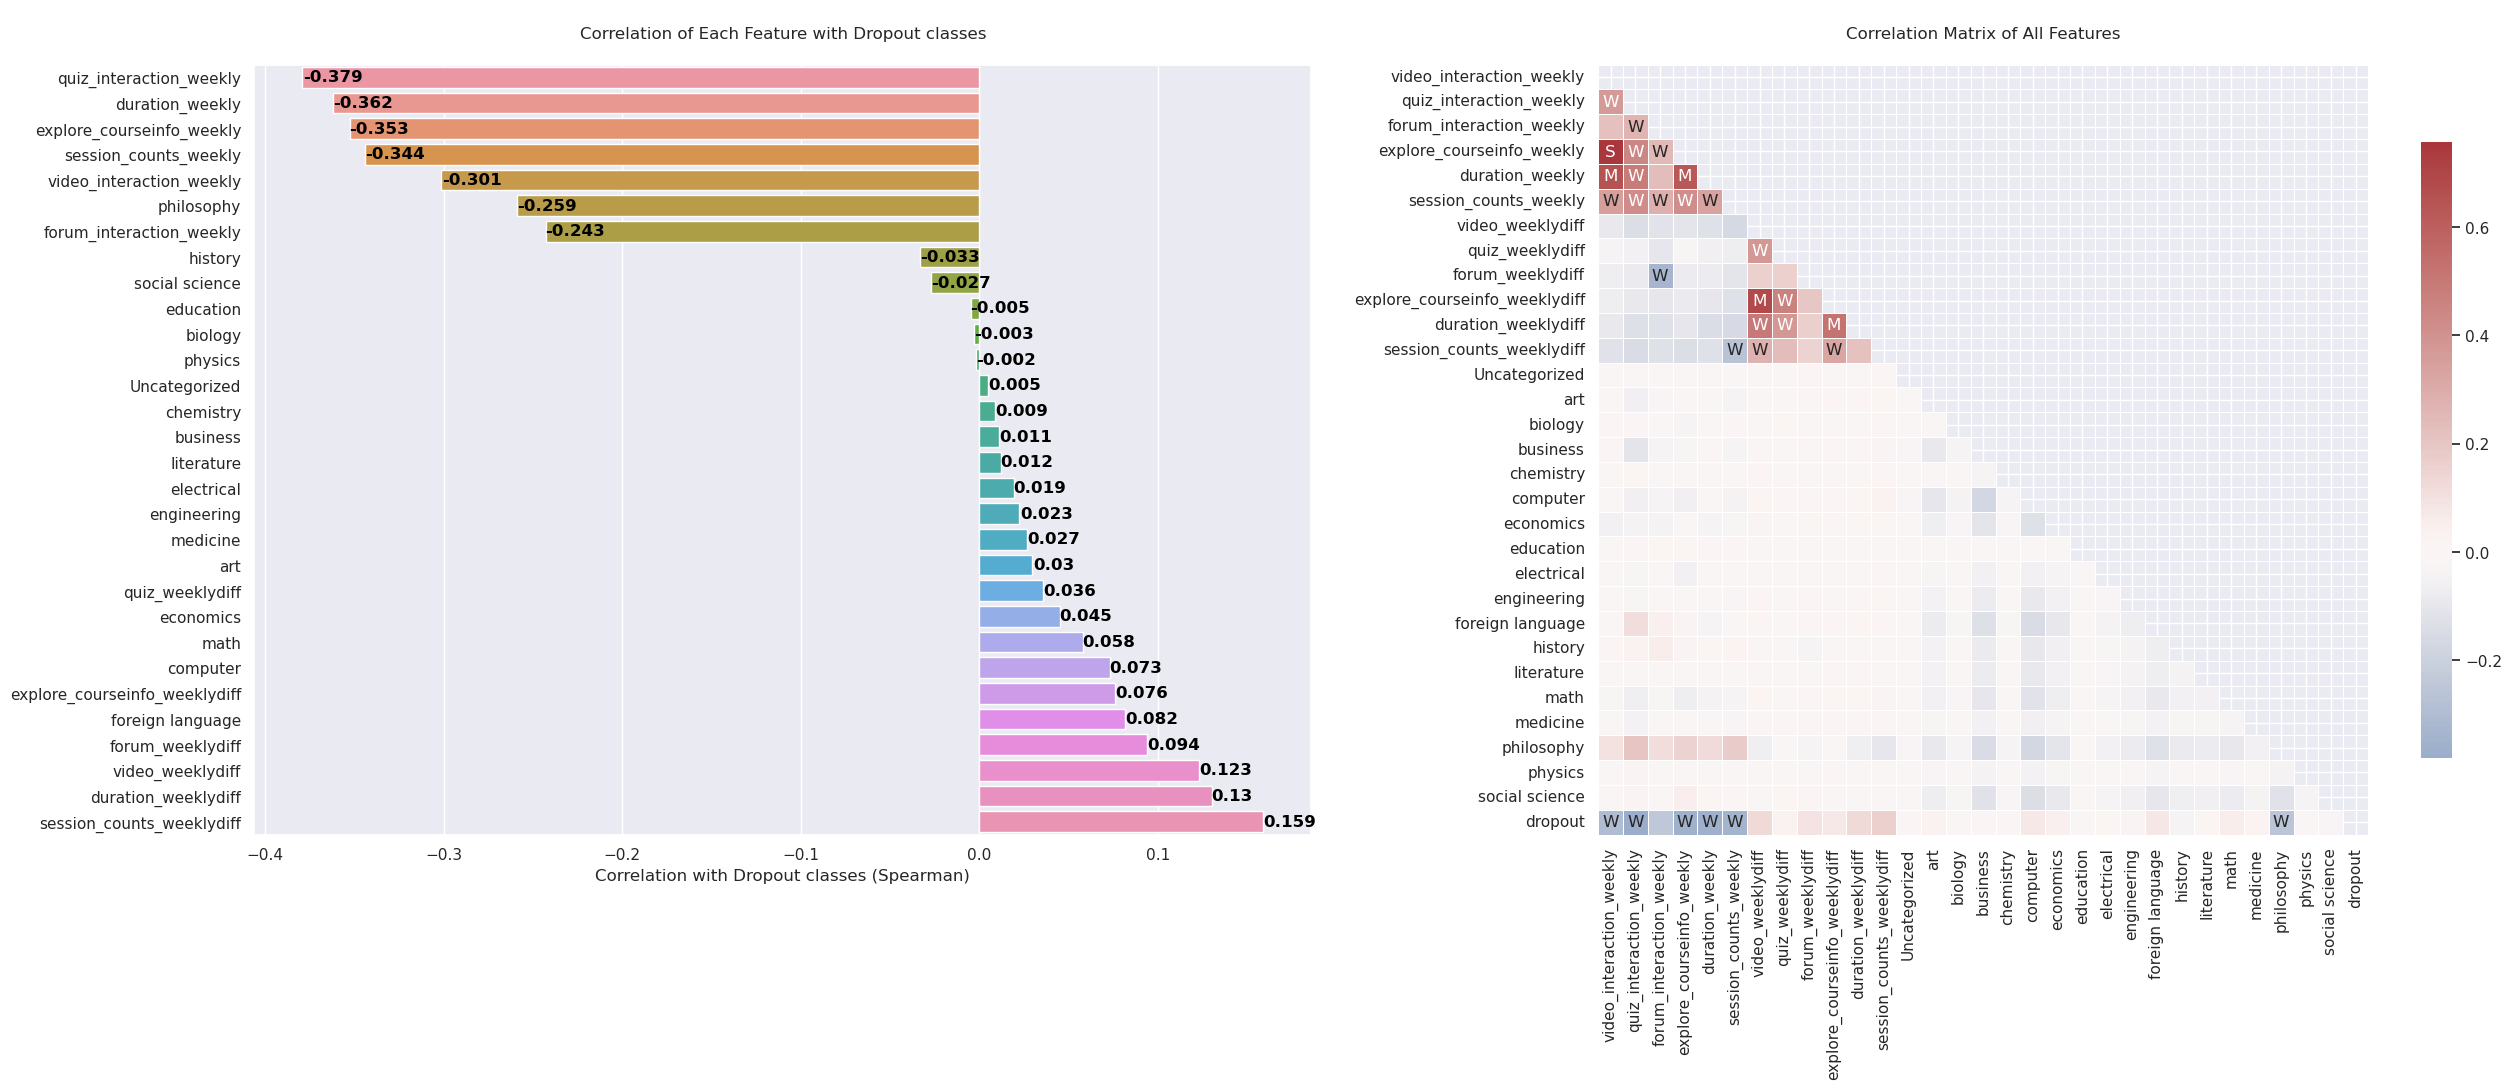

In [122]:
#### >> CORRELATION BETWEEN COLUMNS
#corr() using the Spearman method that could detect non-linear relationship between variables


corr = studentactivity_weightedavg_pd.drop(columns=['enroll_id','course_category']).corr('spearman') # corr() using the Spearman method that could detect variable relationship in non-linear scenarios
targetclass_corr = corr.reset_index().iloc[:-1,:] # correlation between predictors and dropout as target column


#...VISUALIZATION
fig, ax = plt.subplots(1,2,figsize=(30,10))

#....SUBPLOT1: Correlation of each feature with dropout column
sns.barplot(data=targetclass_corr,
           x='dropout',
           y='index',
           order=targetclass_corr.sort_values('dropout')['index'],
           orient='h', ax=ax[0])
for i, v in enumerate(np.around(targetclass_corr.sort_values('dropout')['dropout'],3)):
    ax[0].text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')
# ax[0].bar_label(container=ax[0].containers[0], labels=np.around(train_targetclass_nooutlier_corr.sort_values('dropout')['dropout'],3))
ax[0].set_title('\nCorrelation of Each Feature with Dropout classes\n')
ax[0].set_ylabel('')
ax[0].set_xlabel('Correlation with Dropout classes (Spearman)')

#....SUBPLOT2: Correlation Matrix of All Features
labels_corr = np.where(np.abs(corr)>0.75,'S', # correlation more than +/- 75% labelled as 'STRONG CORRELATION'
                  np.where(np.abs(corr)>0.5,'M', # correlation more than +/- 50% labelled as 'MEDIUM CORRELATION'
                           np.where(np.abs(corr)>0.25,'W',''))) # correlation more than +/- 25% labelled as 'WEAK CORRELATION'

sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), square=True,
            center=0, annot=labels_corr, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}, ax=ax[1])
ax[1].set_title('Correlation Matrix of All Features\n')

# plt.tight_layout(pad=2)

In [131]:
#### >> FEATURE SELECTION 

dropped_columns = ['video_interaction_weekly', 'video_weeklydiff']

list_course_category = list(studentactivity_weightedavg['course_category'].to_pandas().unique())

FEATURES = [
    # 'video_interaction_weekly',
     'quiz_interaction_weekly',
     'forum_interaction_weekly',
     'explore_courseinfo_weekly',
     'duration_weekly',
     'session_counts_weekly',

 # 'video_weeklydiff',
 'quiz_weeklydiff',
 'forum_weeklydiff',
 'explore_courseinfo_weeklydiff',
 'duration_weeklydiff',
 'session_counts_weeklydiff',
                            ] + list_course_category

FEATURES

['quiz_interaction_weekly',
 'forum_interaction_weekly',
 'explore_courseinfo_weekly',
 'duration_weekly',
 'session_counts_weekly',
 'quiz_weeklydiff',
 'forum_weeklydiff',
 'explore_courseinfo_weeklydiff',
 'duration_weeklydiff',
 'session_counts_weeklydiff',
 'philosophy',
 'computer',
 'engineering',
 'history',
 'art',
 'economics',
 'social science',
 'electrical',
 'math',
 'chemistry',
 'literature',
 'physics',
 'biology',
 'Uncategorized',
 'medicine',
 'foreign language',
 'business',
 'education']

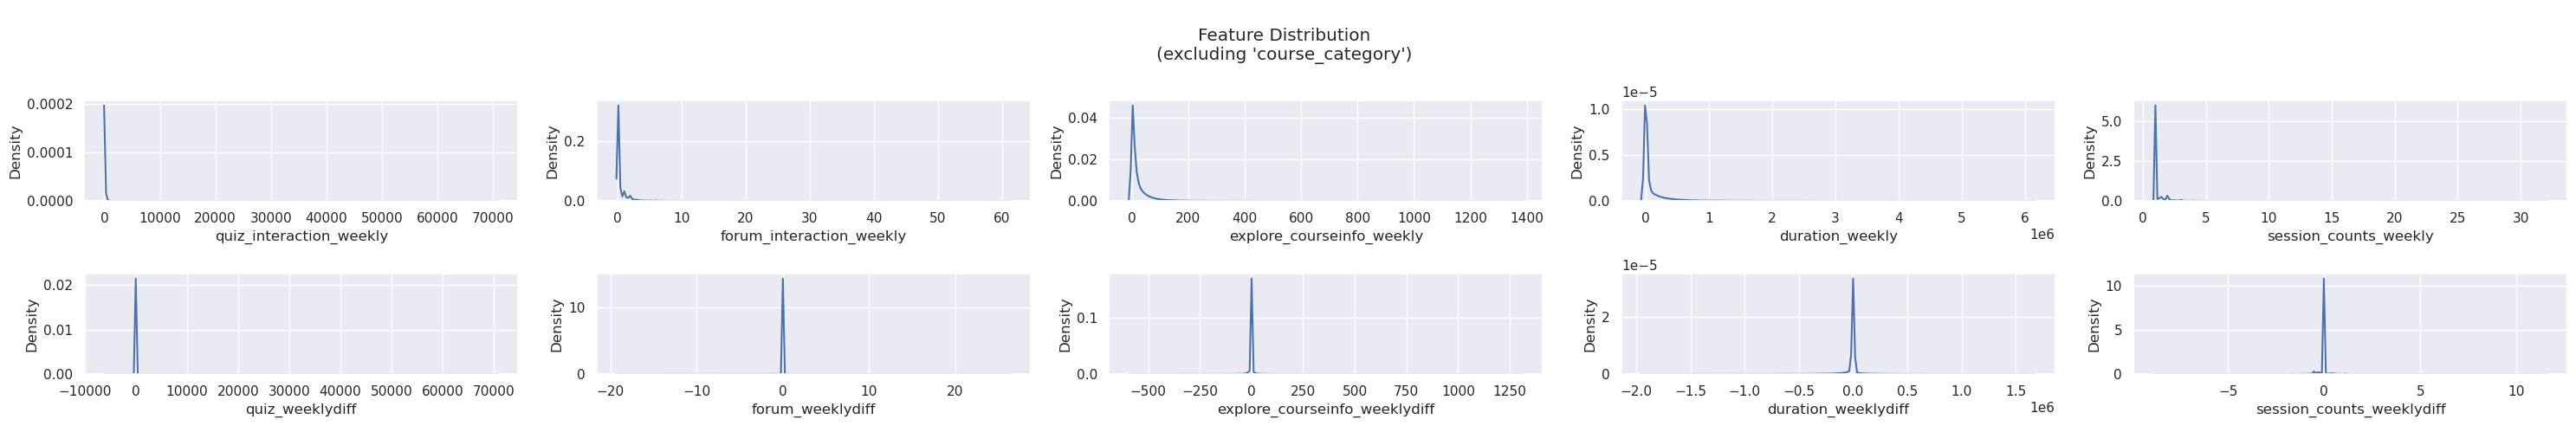

In [132]:
#### >> FEATURE DISTRIBUTION

cols_kdeplot = list(studentactivity_weightedavg_pd.iloc[:,1:13]
                    .drop(columns=dropped_columns)
                    .columns)
len_per_subplot = int(len(cols_kdeplot)/2)
enumerate_subplot = [i for i in range(len_per_subplot)]*2

fig, ax = plt.subplots(2, len_per_subplot, figsize=(30,5))

for i, col in zip(enumerate_subplot, cols_kdeplot):
    if '_weeklydiff' not in col:
        sns.kdeplot(data=studentactivity_weightedavg_pd[cols_kdeplot], 
                    x=col, ax=ax[0][i]) #plot feature distribution
    else:
        sns.kdeplot(data=studentactivity_weightedavg_pd[cols_kdeplot], 
                    x=col, ax=ax[1][i]) #plot feature distribution

plt.suptitle('\nFeature Distribution\n(excluding \'course_category\')')
plt.tight_layout()
# plt.savefig('feature_distribution.png')

In [133]:
studentactivity_weightedavg_pd.iloc[:,1:].drop(columns=dropped_columns).describe()

,quiz_interaction_weekly,forum_interaction_weekly,explore_courseinfo_weekly,duration_weekly,session_counts_weekly,quiz_weeklydiff,forum_weeklydiff,explore_courseinfo_weeklydiff,duration_weeklydiff,session_counts_weeklydiff,Uncategorized,art,biology,business,chemistry,computer,economics,education,electrical,engineering,foreign language,history,literature,math,medicine,philosophy,physics,social science,dropout
count,225642.000000,225642.000000,225642.000000,2.256420e+05,225642.000000,225642.000000,225642.000000,225642.000000,2.256420e+05,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000,225642.000000
mean,12.626941,0.086404,22.429105,1.037448e+05,1.237219,0.001513,-0.006027,-1.155673,-6.865497e+03,-0.028484,0.003869,0.050496,0.009449,0.133738,0.007742,0.163680,0.074521,0.001618,0.017040,0.041194,0.101067,0.045532,0.041118,0.062183,0.019132,0.129688,0.011833,0.086101,0.758427
std,170.088629,0.661873,41.000328,2.772042e+05,0.597542,153.689089,0.312562,19.623393,1.127876e+05,0.301034,0.062081,0.218966,0.096744,0.340372,0.087650,0.369985,0.262617,0.040187,0.129422,0.198738,0.301418,0.208469,0.198564,0.241487,0.136990,0.335960,0.108134,0.280514,0.428038
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,-6175.735458,-19.244190,-589.422045,-1.927502e+06,-8.797344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.374631e+02,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,9.000000,2.204000e+03,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,0.000000,24.681350,7.214115e+04,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,70915.389637,61.210415,1376.254416,6.095807e+06,32.000000,70915.389637,26.372905,1310.254416,1.653612e+06,11.546514,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0.98, 'Length of Active Weeks\n(Dropout students)')

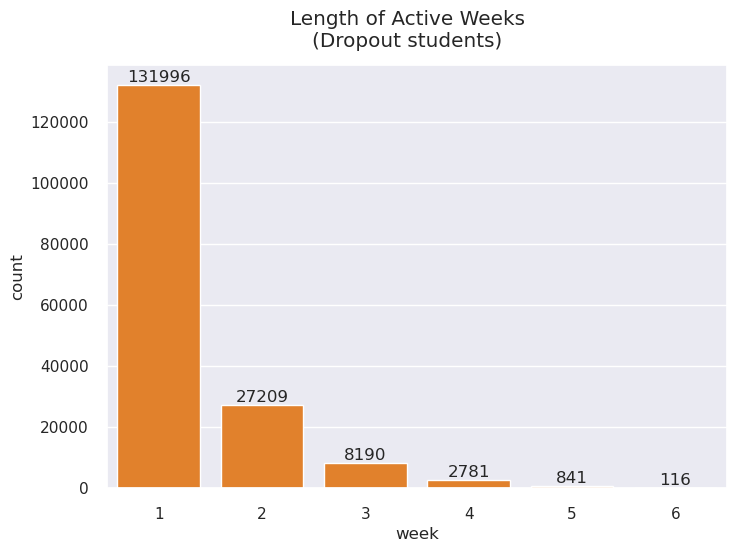

In [239]:
active_weeks = session_weekly_activity.merge(student_info[['enroll_id','dropout']], on='enroll_id', how='left').groupby(['enroll_id','dropout'], as_index=False).count()
active_weeks = active_weeks[['enroll_id','dropout','week']]
fig = sns.countplot(data=active_weeks[active_weeks['dropout']==1].to_pandas(), x='week', color='tab:orange')
for i in fig.containers:
    fig.bar_label(i,)
plt.suptitle('Length of Active Weeks\n(Dropout students)')

Text(0.5, 1.0, 'Length of Active Weeks in MOOC')

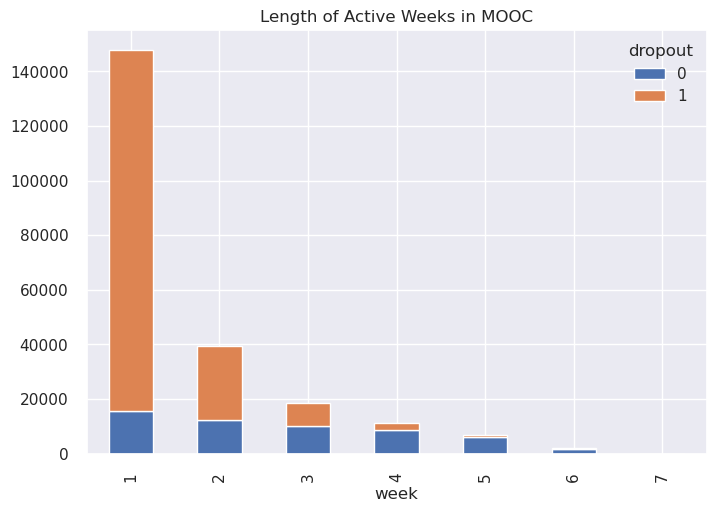

In [253]:
active_weeks_plot = active_weeks.to_pandas().groupby(['dropout','week']).size().reset_index().pivot(columns='dropout', index='week', values=0)
active_weeks_plot.plot(kind='bar', stacked=True)
plt.title('Length of Active Weeks in MOOC')

In [565]:
active_weeks['week'].value_counts()

1    147737
2     39410
3     18486
4     11298
5      6793
6      1906
7        12
Name: week, dtype: int32

In [569]:
active_weeks[active_weeks['week']==6]['dropout'].value_counts()

0    1790
1     116
Name: dropout, dtype: int32

In [567]:
active_weeks[active_weeks['week']==7]['dropout'].value_counts()

0    12
Name: dropout, dtype: int32

In [256]:
print('\nAvg. length of active weeks on Dropout student:\n')
active_weeks[active_weeks['dropout']==1]['week'].mean()


Avg. length of active weeks on Dropout student:



1.3265062845856732

In [257]:
print('\nAvg. length of active weeks on Non-dropout student:\n')
active_weeks[active_weeks['dropout']==0]['week'].mean()


Avg. length of active weeks on Non-dropout student:



2.672641215212167

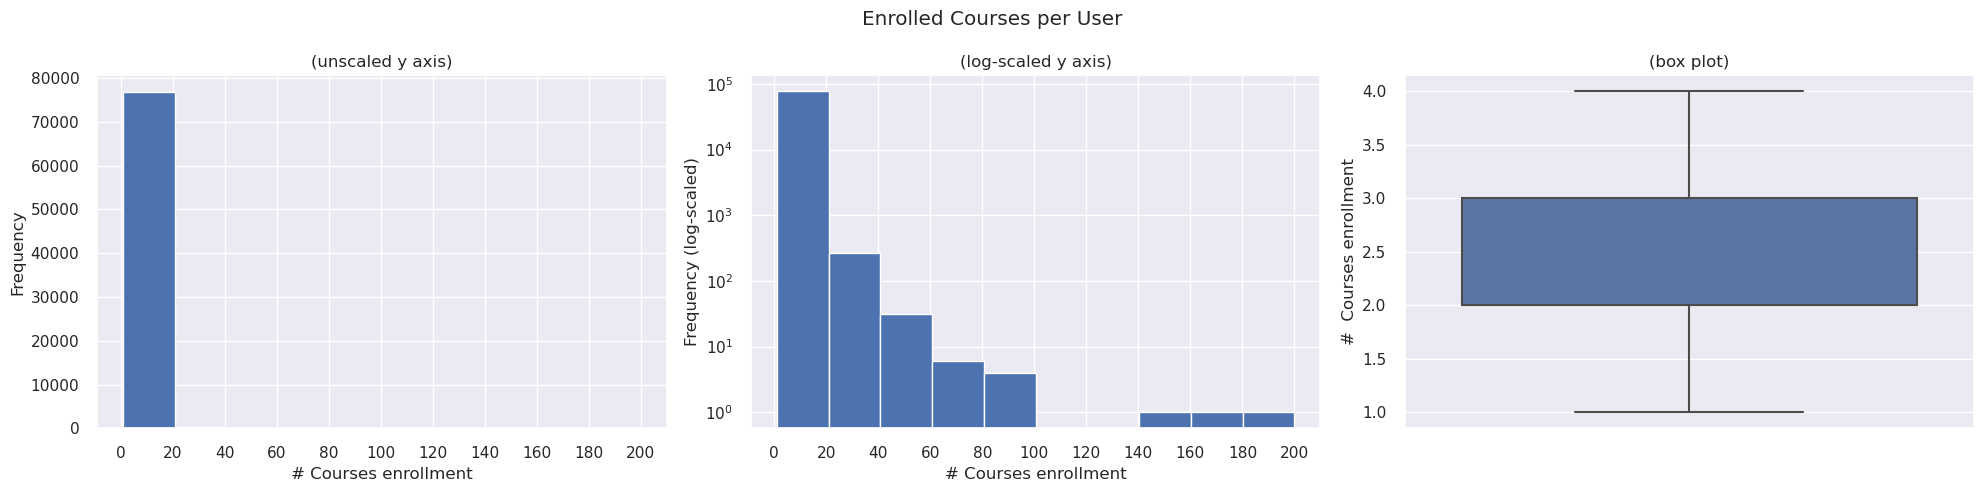

In [269]:
#### >> ENROLLED COURSES PER USER

courses_user = (student_info_pd
                .groupby('username')
                .count()
                .sort_values('enroll_id', ascending=False)
                .reset_index())

fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].hist( courses_user[['enroll_id']] )
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('# Courses enrollment')
ax[0].set_title('(unscaled y axis)')
ax[0].set_xticks(np.arange(0, 220, 20))

ax[1].hist( courses_user[['enroll_id']] )
ax[1].set_ylabel('Frequency (log-scaled)')
ax[1].set_xlabel('# Courses enrollment')
ax[1].set_yscale('log')
ax[1].set_title('(log-scaled y axis)')
ax[1].set_xticks(np.arange(0, 220, 20))

sns.boxplot(courses_user['enroll_id'], showfliers=False, ax=ax[2])
ax[2].set_ylabel('#  Courses enrollment')
ax[2].set_xticks([])
ax[2].set_title('(box plot)')

plt.suptitle('Enrolled Courses per User')

plt.tight_layout()

Text(0.5, 1.0, 'Course Category distributions')

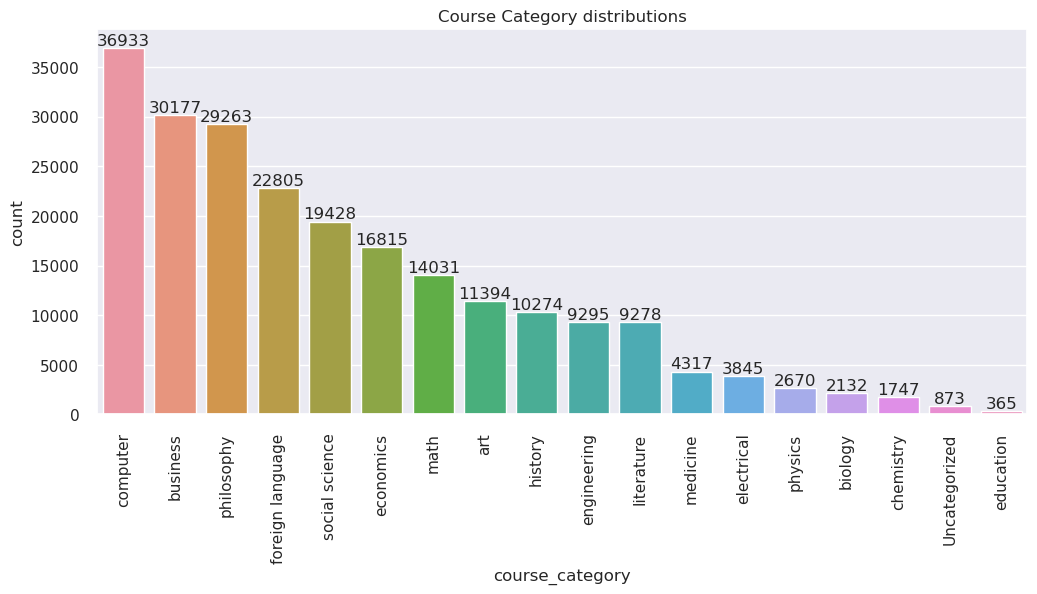

In [87]:
#### >> COURSE CATEGORY DISTRIBUTIONS

plt.figure(figsize=(12,5))
plt.xticks(rotation=90)

order = student_info_pd['course_category'].value_counts(ascending=False).index
labels = student_info_pd['course_category'].value_counts(ascending=False).values

ax = sns.countplot(data=student_info_pd,
                   x='course_category',
                   order = order)

ax.bar_label(container=ax.containers[0], labels=labels)
plt.title('Course Category distributions')

/tmp/ipykernel_15181/2368273063.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_dropout_rate = student_info_pd.groupby('username').mean()['dropout'].reset_index()


Text(0.5, 1.0, 'Number of Enrolled Courses per user vs Dropout rate')

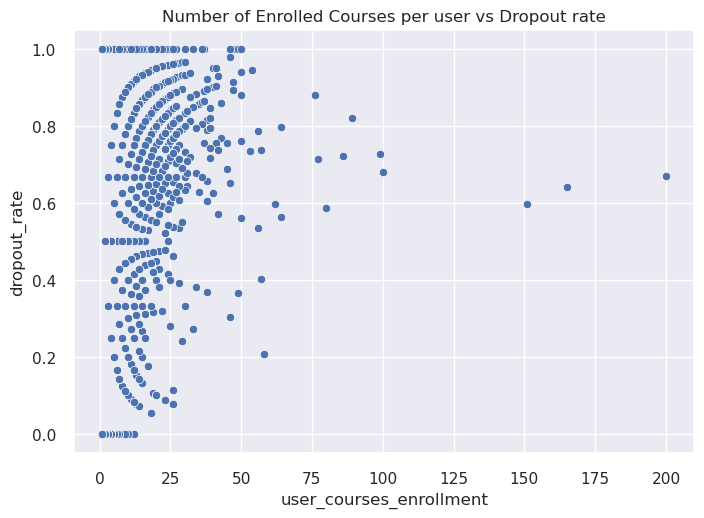

In [88]:
#### >> RELATIONSHIP: NUMBER OF ENROLLED COURSES and DROPOUT RATE (per USER)

user_num_enrollment = student_info_pd.groupby('username').count()['enroll_id'].reset_index()
user_dropout_rate = student_info_pd.groupby('username').mean()['dropout'].reset_index()

user_enroll_dropout = (
                        user_num_enrollment
                        .merge(user_dropout_rate, on='username', how='left')
                        .rename(columns={'enroll_id':'user_courses_enrollment',
                                        'dropout':'dropout_rate'})
                        )

sns.scatterplot(data=user_enroll_dropout, x='user_courses_enrollment', y='dropout_rate')
plt.title('Number of Enrolled Courses per user vs Dropout rate')

Text(0.5, 1.0, 'Dropout Students percentage')

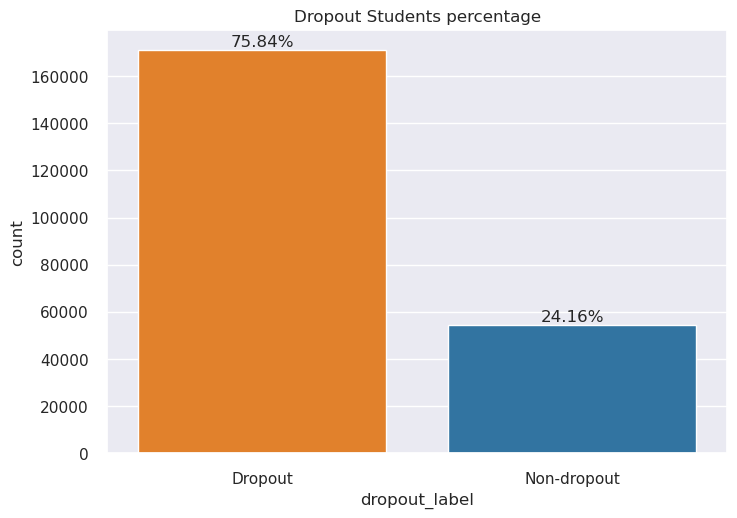

In [89]:
#### >> MOOC STUDENT DROPOUT %

studentactivity_weightedavg_pd['dropout_label'] = (studentactivity_weightedavg_pd['dropout']
                                                   .map({1: 'Dropout', 0: 'Non-dropout'}))
dropout_label = studentactivity_weightedavg_pd['dropout_label']

labels = dropout_label.value_counts(normalize=True, ascending=False).values
labels = np.around(labels*100,2).astype('str')

order = studentactivity_weightedavg_pd['dropout_label'].value_counts(ascending=False).index

ax = sns.countplot(data=studentactivity_weightedavg_pd, x='dropout_label',
                   order = order, palette= {'Dropout':'tab:orange', 'Non-dropout':'tab:blue'})
ax.bar_label(container=ax.containers[0],
             labels=[i+'%'for i in labels]
            )

plt.title('Dropout Students percentage')

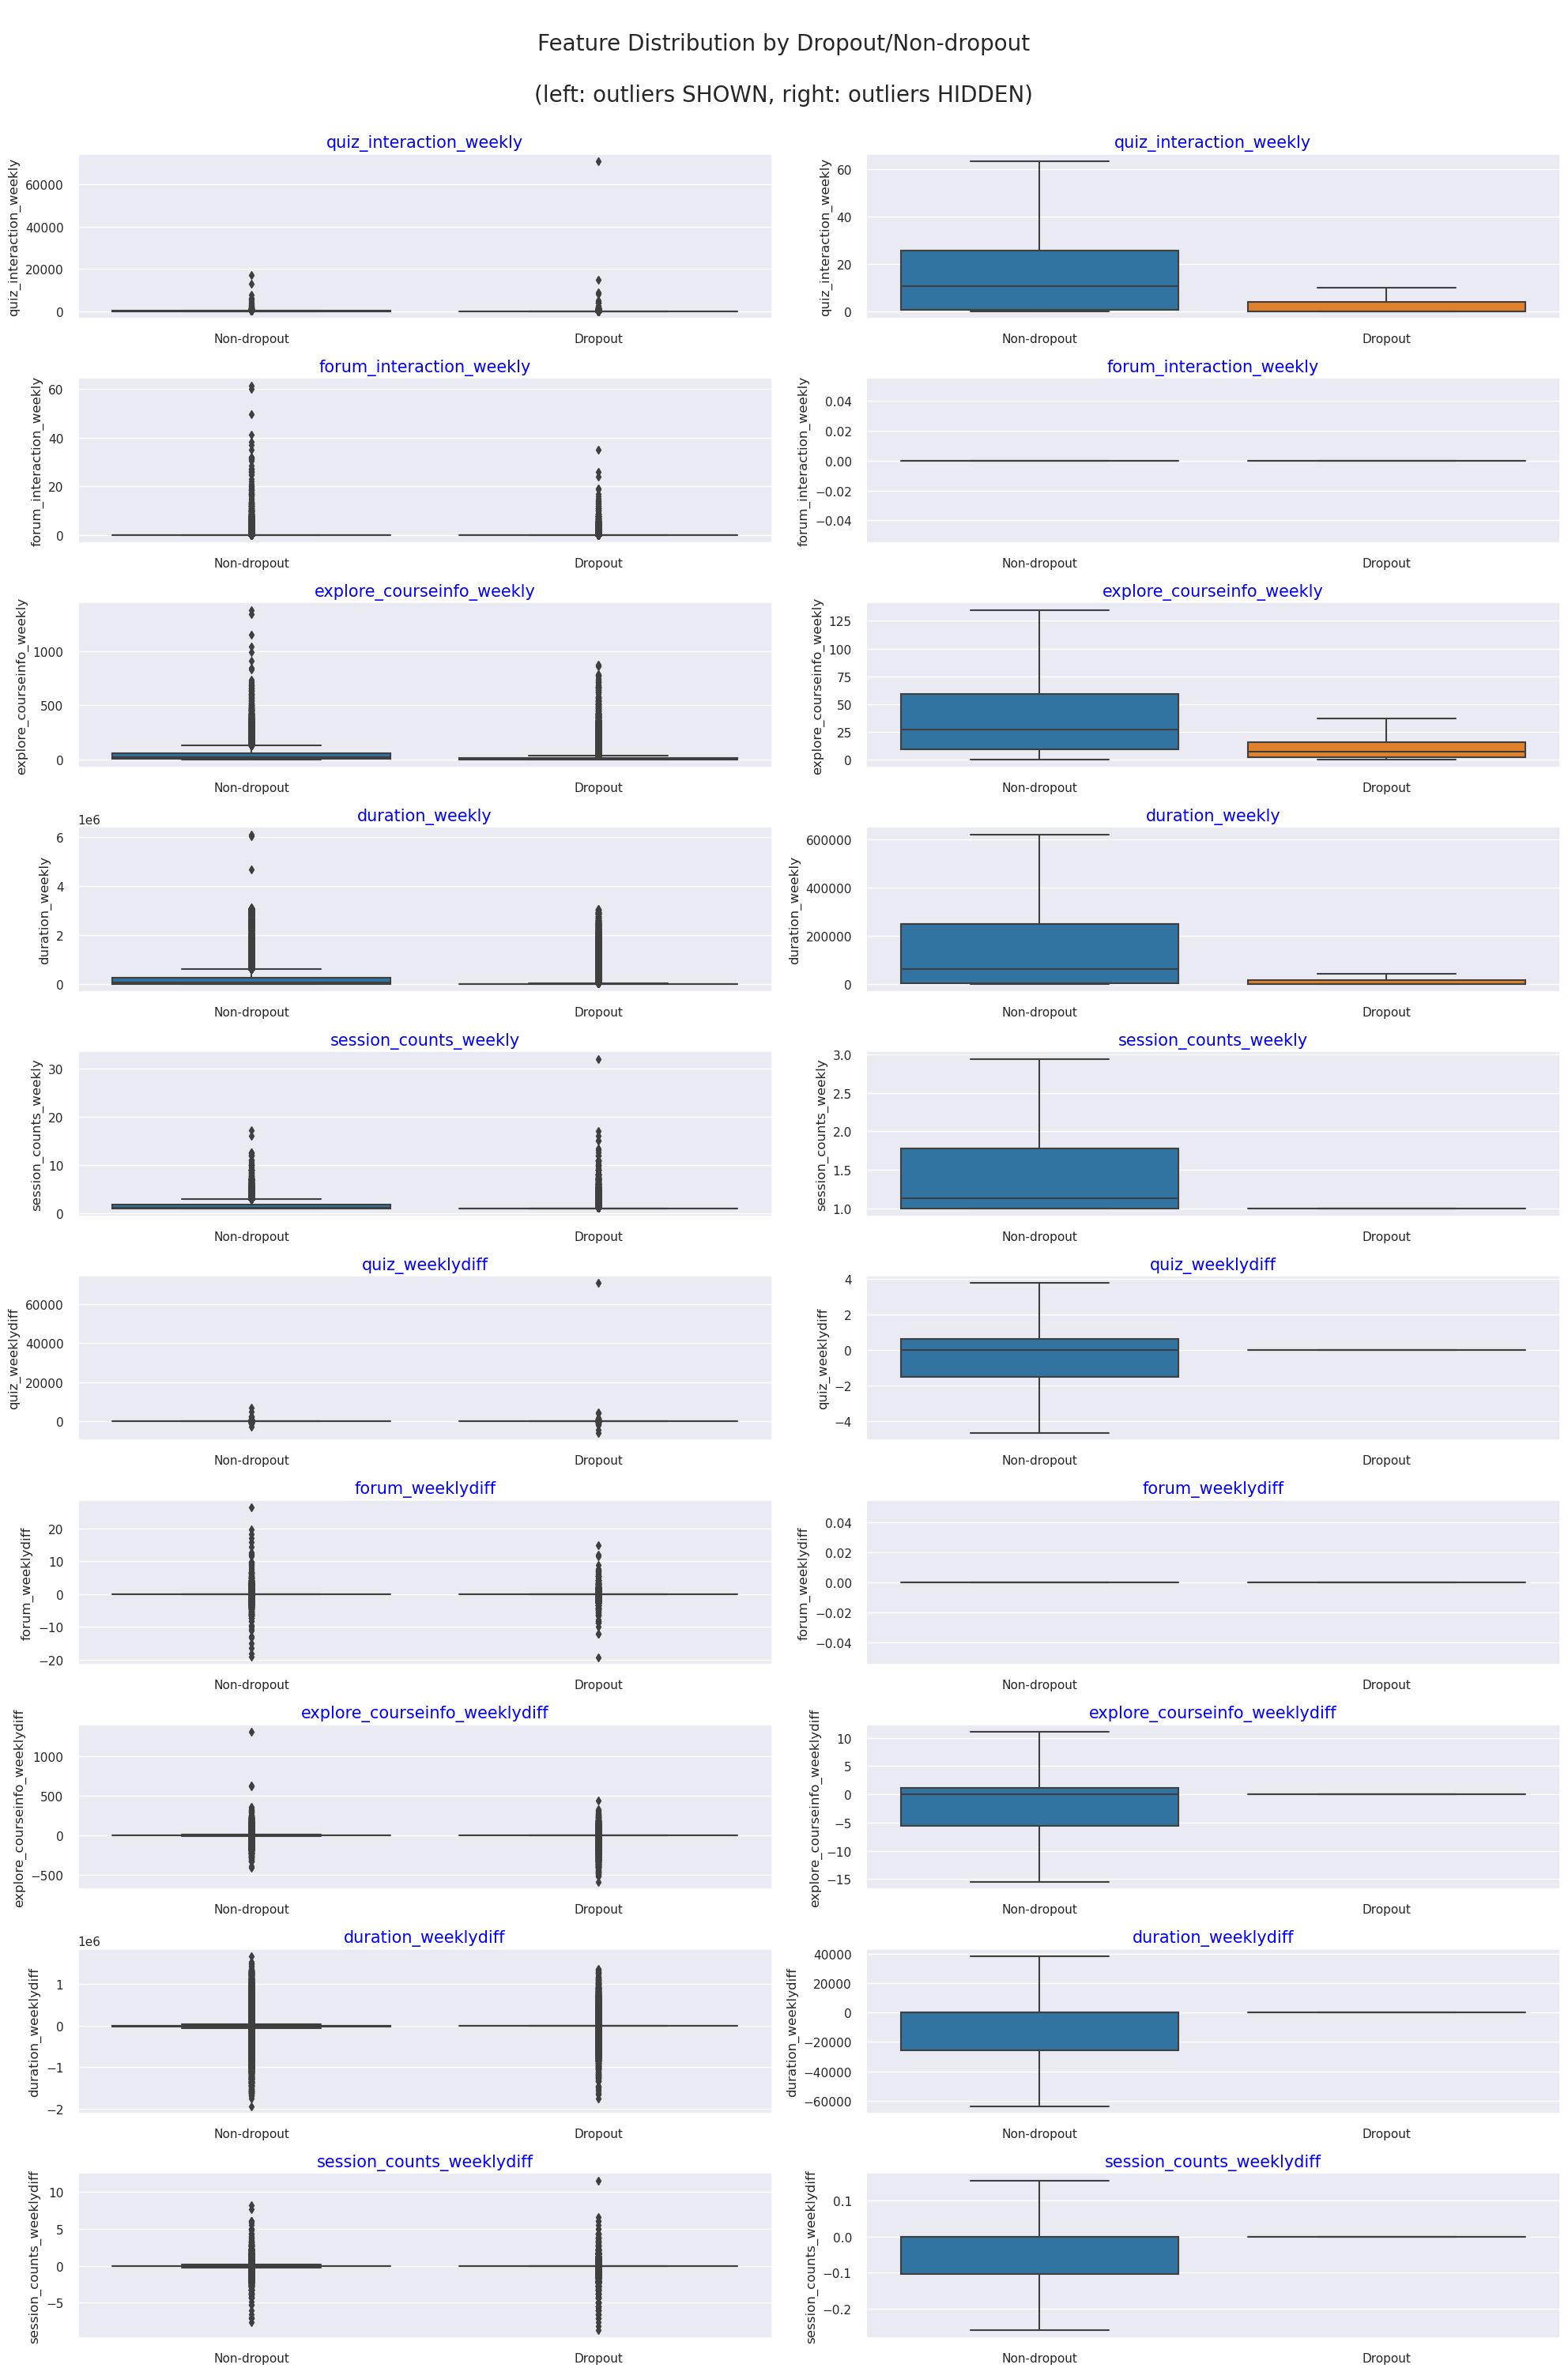

In [90]:
#### >> FEATURE DISTRIBUTION BY DROPOUT/NON-DROPOUT

fig, axes = plt.subplots(10, 2, figsize=(20,30))
fig.suptitle('\nFeature Distribution by Dropout/Non-dropout\n\n(left: outliers SHOWN, right: outliers HIDDEN)', fontsize=20, y=1)
palettes = {'Dropout':'tab:orange', 'Non-dropout':'tab:blue'}
cols = FEATURES[:-1]

# create boxplot in each subplot
for i, feat in enumerate(cols):

    sns.boxplot(data=studentactivity_weightedavg_pd, x='dropout_label', y=feat,palette=palettes,  ax=axes[i, 0])
    sns.boxplot(data=studentactivity_weightedavg_pd, x='dropout_label', y=feat, palette=palettes, showfliers=False, ax=axes[i, 1]) #showfliers=False is for ignoring outlier
    axes[i,0].set_title(feat, fontsize=15, color='blue')
    axes[i,1].set_title(feat, fontsize=15, color='blue')
    axes[i,0].set(xlabel=None)
    axes[i,1].set(xlabel=None)

plt.tight_layout()
plt.show()

In [91]:
#### >> COURSES DROPOUT STATISTICS

course_category_list = list(student_info_pd['course_category'].unique())

list_courses_dropout = []

for coursecatg in course_category_list:
    course_studentdata = student_info_pd.query(f'course_category==\'{coursecatg}\'')
    course_drop_pct = course_studentdata['dropout'].value_counts(normalize=True).mul(100).sort_index()
    course_drop_count = course_studentdata['dropout'].value_counts().sort_index()

    list_courses_dropout.append([coursecatg])
    list_courses_dropout[-1].extend(course_drop_pct)
    list_courses_dropout[-1].extend(course_drop_count)

courses_dropout_df = pd.DataFrame(list_courses_dropout)
courses_dropout_df.columns = ['course_category', 'non_dropout_percentage', 'dropout_percentage', 'non_dropout_numbers', 'dropout_numbers']
courses_dropout_df.sort_values('non_dropout_percentage', ascending=False)

,course_category,non_dropout_percentage,dropout_percentage,non_dropout_numbers,dropout_numbers
7,philosophy,52.892731,47.107269,15478,13785
4,history,30.659918,69.340082,3150,7124
17,education,29.315068,70.684932,107,258
5,social science,27.918468,72.081532,5424,14004
13,biology,25.328330,74.671670,540,1592
...,...,...,...,...,...
11,economics,17.300030,82.699970,2909,13906
1,computer,17.063331,82.936669,6302,30631
0,medicine,16.006486,83.993514,691,3626
8,math,14.467964,85.532036,2030,12001


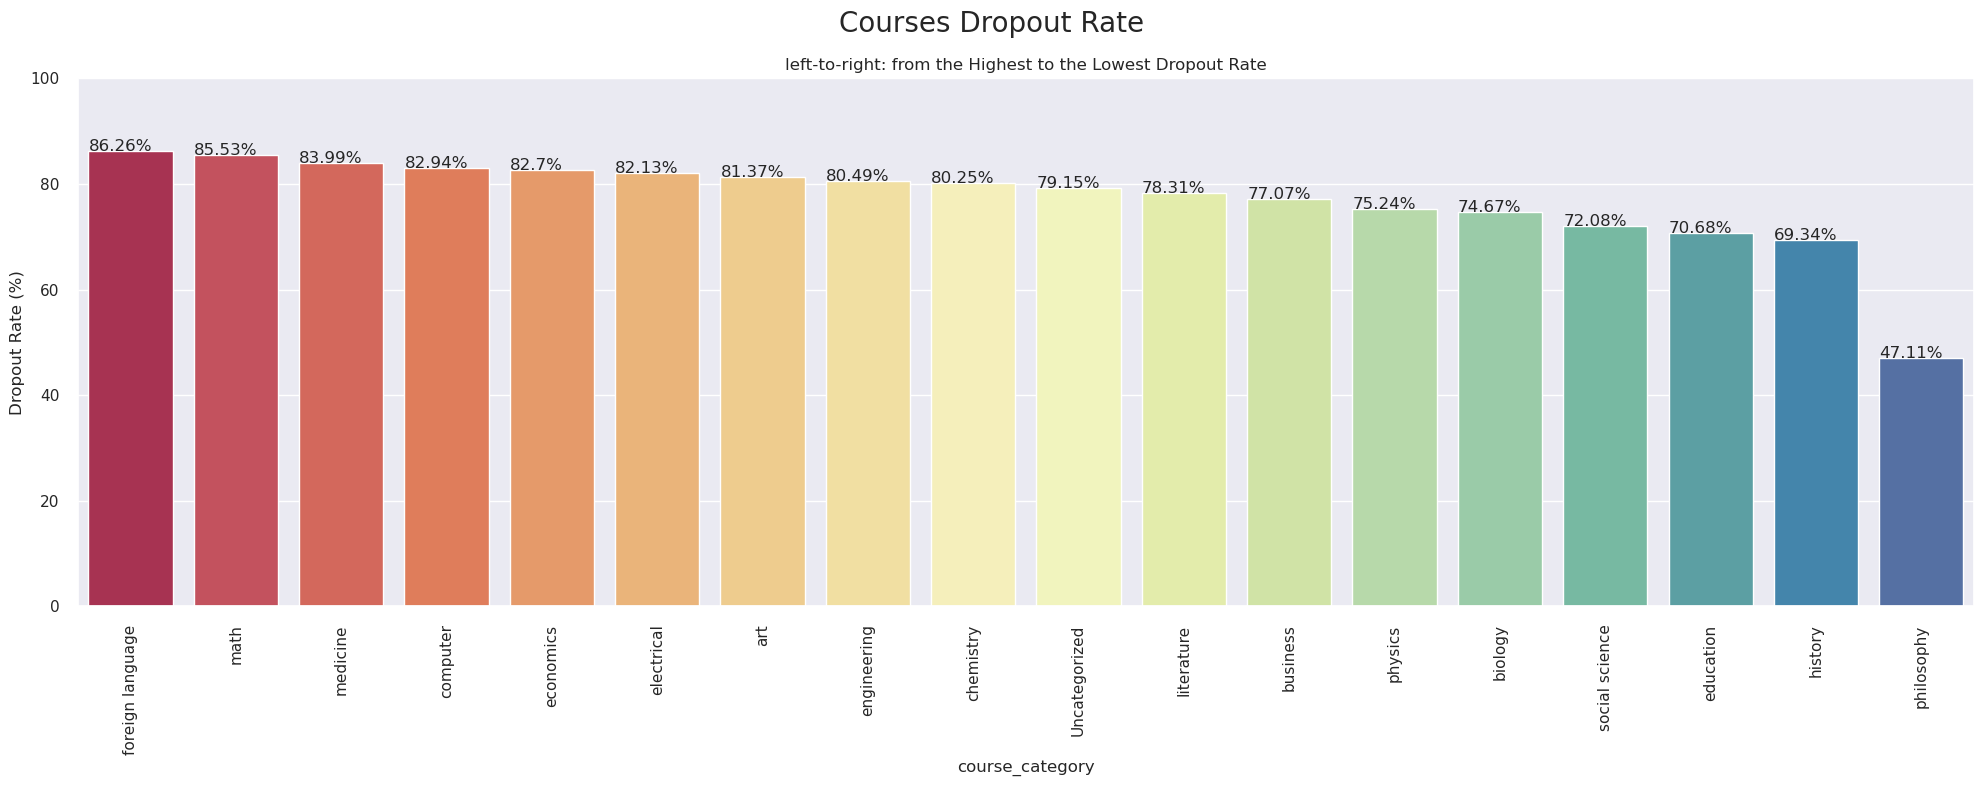

In [92]:
#### >> COURSES DROPOUT RATE (%)

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.suptitle('Courses Dropout Rate',fontsize=20)
plt.title('left-to-right: from the Highest to the Lowest Dropout Rate')

courses_dropout_rate = courses_dropout_df[['course_category', 'dropout_percentage']]

order = (courses_dropout_rate
         .sort_values('dropout_percentage', ascending=False)
         .loc[:,'course_category']
         .ravel())

g = sns.barplot(data=courses_dropout_rate,
                x='course_category', y='dropout_percentage',
                order = order,
                palette='Spectral'
               )

for p in g.patches:
    txt = str(np.around(p.get_height(),2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)

plt.ylabel('Dropout Rate (%)')
plt.tight_layout()
plt.show()

# **Hyperparameter tuning**

In [538]:
from hyperparameter_tuning import *

In [764]:
RANDOM_STATE = 42
HYPERPARAMTUNE_MODE = 'grid' # set hyperparameter tuning mode: 'grid' search aka. exhaustive search
F1SCORE = 'weighted' # use f1-score 'macro' as the evaluation metrics used in hyperparam. tuning process
KFOLD = 5 # use 5-fold cross-validation when choosing the best hyperparam.

In [869]:
#### >> INITIALIZE BASE LEARNER ESTIMATOR

# GPU
svc_gpu = cl_LinearSVC(probability=True)
logreg_gpu = cl_LogisticRegression(class_weight='balanced')
knn_gpu = cl_KNeighborsClassifier()
nb_gpu = cl_GaussianNB()
rf_gpu =  cl_RandomForestClassifier(max_depth=16, random_state = RANDOM_STATE, n_streams=1, n_bins=256)
xgb_gpu = XGBClassifier(gpu_id=0, tree_method='gpu_hist', max_bin=256, random_state = RANDOM_STATE, booster='gbtree')

# CPU
svc_cpu = CalibratedClassifierCV(sk_LinearSVC(dual=False, class_weight='balanced', random_state = RANDOM_STATE), n_jobs=-1)
logreg_cpu = sk_LogisticRegression(class_weight='balanced', random_state = RANDOM_STATE, n_jobs=-1)
knn_cpu = sk_KNeighborsClassifier(n_jobs=-1)
nb_cpu = sk_GaussianNB()
rf_cpu =  sk_RandomForestClassifier(max_depth=16, random_state = RANDOM_STATE, class_weight='balanced', n_jobs=-1)
xgb_cpu = XGBClassifier(n_jobs=-1, random_state = RANDOM_STATE, booster='gbtree')

In [903]:
#### >> DEFINE HYPERPARAMETER SPACE

# LinearSVC
SVC_gpu_paramdict = {"C": [0.0001, 0.001, 0.01, 0.1, 1.0],
                  'penalty': ['l1','l2'], #for LinearSVC
                  'loss':['squared_hinge', 'hinge'], #for LinearSVC
                  }

SVC_cpu_paramdict = {"estimator__C": [0.01, 0.1, 1],
                  'estimator__penalty': ['l1','l2'], #for LinearSVC
                  'estimator__loss':['squared_hinge', 'hinge'], #for LinearSVC
                  }

# LogReg
LogReg_gpu_paramdict = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0],
                        'penalty':['l2', 'none']}
LogReg_cpu_paramdict = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0],
                        'penalty':['l2', None]}

# KNN
KNN_paramdict = {'n_neighbors': [3,5,7,9]}


# RF
RF_gpu_paramdict = {'n_estimators': [100,500],
                    'split_criterion':[0,1], # 0:'gini', 1:'entropy'
                    'max_features':['sqrt','log2']}
RF_cpu_paramdict = {'n_estimators': [100,500],
                    'criterion':['gini','entropy'],
                    'max_features':['sqrt','log2']}

# XGB
XGB_paramdict = {'n_estimators':[100,500],
                 'learning_rate':[0.001,0.01,0.1,0.2,0.3]}

Hyperparameter tuning on GPU

In [904]:
%%time
#### >> INITIALIZE BASE LEARNER ESTIMATOR

# GPU
svc_gpu = cl_LinearSVC(probability=True)
logreg_gpu = cl_LogisticRegression(class_weight='balanced')
knn_gpu = cl_KNeighborsClassifier()
nb_gpu = cl_GaussianNB()
rf_gpu =  cl_RandomForestClassifier(max_depth=16, random_state = RANDOM_STATE, n_streams=1, n_bins=256)
xgb_gpu = XGBClassifier(gpu_id=0, tree_method='gpu_hist', max_bin=256, random_state = RANDOM_STATE, booster='gbtree')


svc_gpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE, 'GPU', 'SVM', svc_gpu, SVC_gpu_paramdict, np.array(x_train_scaled[FEATURES]), y_train.astype('int32'), F1SCORE, KFOLD)
logreg_gpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE, 'GPU', 'LogReg', logreg_gpu, LogReg_gpu_paramdict, np.array(x_train_scaled[FEATURES]), y_train.astype('int32'), F1SCORE, KFOLD)
knn_gpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE, 'GPU', 'KNN', knn_gpu, KNN_paramdict, np.array(x_train_scaled[FEATURES]), y_train.astype('int32'), F1SCORE, KFOLD)
rf_gpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE, 'GPU', 'RF', rf_gpu, RF_gpu_paramdict, np.array(x_train_nooutlier[FEATURES]), y_train.astype('int32'), F1SCORE, KFOLD)
xgb_gpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE,'GPU', 'XGB', xgb_gpu, XGB_paramdict, np.array(x_train_nooutlier[FEATURES]), y_train.astype('int32'), F1SCORE, KFOLD)

Hyperparameter tuning for SVM...(GPU)
[W] [07:33:09.521870] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:10.805211] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:10.863988] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:10.965797] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:11.641977] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:12.362799] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:14.342813] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:14.497738] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:14.621663] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
[W] [07:33:14.671354] L-BF

Hyperparameter tuning on CPU

In [927]:
%%time
svc_cpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE,'CPU', 'SVM', svc_cpu, SVC_cpu_paramdict, np.array(x_train_scaled[FEATURES]), np.array(y_train).ravel().astype('int32'), F1SCORE, KFOLD)
logreg_cpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE, 'CPU', 'LogReg', logreg_cpu, LogReg_cpu_paramdict, np.array(x_train_scaled[FEATURES]), np.array(y_train).ravel().astype('int32'), F1SCORE, KFOLD)
knn_cpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE, 'CPU', 'KNN', knn_cpu, KNN_paramdict, np.array(x_train_scaled[FEATURES]), np.array(y_train).ravel().astype('int32'), F1SCORE, KFOLD)
rf_cpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE, 'CPU', 'RF', rf_cpu, RF_cpu_paramdict, np.array(x_train_nooutlier[FEATURES]), np.array(y_train).ravel().astype('int32'), F1SCORE, KFOLD)
xgb_cpu = hyperparameter_tuning(HYPERPARAMTUNE_MODE,'CPU', 'XGB', xgb_cpu, XGB_paramdict, np.array(x_train_nooutlier[FEATURES]), np.array(y_train).ravel().astype('int32'), F1SCORE, KFOLD)

Hyperparameter tuning for SVM...(CPU)


/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home


Best hyperparameter for SVM:
{'estimator__C': 0.01, 'estimator__loss': 'squared_hinge', 'estimator__penalty': 'l1'}

Train score:
F1-score (weighted) = 0.7777611412287995

--- SVM (CPU) IS TUNED IN 0:02:03.526353 ---


Hyperparameter tuning for LogReg...(CPU)


/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.


Best hyperparameter for LogReg:
{'C': 0.1, 'penalty': 'l2'}

Train score:
F1-score (weighted) = 0.7743325360932694

--- LogReg (CPU) IS TUNED IN 0:01:27.922727 ---


Hyperparameter tuning for KNN...(CPU)

Best hyperparameter for KNN:
{'n_neighbors': 9}

Train score:
F1-score (weighted) = 0.8125048024071763

--- KNN (CPU) IS TUNED IN 0:00:34.032430 ---


Hyperparameter tuning for RF...(CPU)

Best hyperparameter for RF:
{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 500}

Train score:
F1-score (weighted) = 0.8232904485447378

--- RF (CPU) IS TUNED IN 0:03:07.980751 ---


Hyperparameter tuning for XGB...(CPU)

Best hyperparameter for XGB:
{'learning_rate': 0.1, 'n_estimators': 100}

Train score:
F1-score (weighted) = 0.8324170537219961

--- XGB (CPU) IS TUNED IN 0:05:24.670021 ---


CPU times: user 1h 46min 21s, sys: 2min 11s, total: 1h 48min 32s
Wall time: 12min 38s


# **Super Learner**

## *Training base learners in Cross-Val (for building meta-learner)*

In [357]:
from cross_validation_SL import *

In [736]:
RANDOM_STATE = 42
F1SCORE = 'weighted'
KFOLD = 5

We will re-define the base learner estimators manually using the best_params_

In [871]:
svc_gpu = cl_LinearSVC(probability=True,
                       C=svc_gpu.best_params_['C'],
                       loss=svc_gpu.best_params_['loss'],
                       penalty=svc_gpu.best_params_['penalty'])

logreg_gpu = cl_LogisticRegression(class_weight='balanced',
                                   C=logreg_gpu.best_params_['C'],
                                   penalty=logreg_gpu.best_params_['penalty'])

knn_gpu = cl_KNeighborsClassifier(n_neighbors=knn_gpu.best_params_['n_neighbors'])

nb_gpu = cl_GaussianNB()

rf_gpu =  cl_RandomForestClassifier(max_depth=16,
                                    random_state = RANDOM_STATE,
                                    n_streams=1,
                                    n_bins=256,
                                    max_features=rf_gpu.best_params_['max_features'],
                                    n_estimators=rf_gpu.best_params_['n_estimators'],
                                    split_criterion=rf_gpu.best_params_['split_criterion'])

xgb_gpu = XGBClassifier(gpu_id=0,
                        tree_method='gpu_hist',
                        max_bin=256, ##########!!!!!
                        random_state = RANDOM_STATE,
                        booster='gbtree',
                        n_estimators=xgb_gpu.best_params_['n_estimators'],
                        learning_rate=xgb_gpu.best_params_['learning_rate'])

In [928]:
svc_cpu = CalibratedClassifierCV(sk_LinearSVC(dual=False,
                                              class_weight='balanced',
                                              random_state = RANDOM_STATE,
                                              C=svc_cpu.best_params_['estimator__C'],
                                              loss=svc_cpu.best_params_['estimator__loss'],
                                              penalty=svc_cpu.best_params_['estimator__penalty']),
                                n_jobs=-1)


logreg_cpu = sk_LogisticRegression(class_weight='balanced',
                                   random_state = RANDOM_STATE,
                                   n_jobs=-1,
                                   C=logreg_cpu.best_params_['C'],
                                   penalty=logreg_cpu.best_params_['penalty'])

knn_cpu = sk_KNeighborsClassifier(n_jobs=-1,
                                  n_neighbors=knn_cpu.best_params_['n_neighbors'])

nb_cpu = sk_GaussianNB()

rf_cpu = sk_RandomForestClassifier(max_depth=16, random_state = RANDOM_STATE, class_weight='balanced', n_jobs=-1,
                                   criterion=rf_cpu.best_params_['criterion'],
                                   max_features=rf_cpu.best_params_['max_features'],
                                   n_estimators=rf_cpu.best_params_['n_estimators'])


xgb_cpu = XGBClassifier(n_jobs=-1, random_state = RANDOM_STATE, booster='gbtree',
                        n_estimators=xgb_cpu.best_params_['n_estimators'],
                        learning_rate=xgb_cpu.best_params_['learning_rate'])

Cross-validation training on GPU

In [909]:
%%time
Z_crossvaltrain_for_building_metalearner_gpu = train_baselearner_crossval(['SVM','LogReg','KNN','NB','RF','XGB'],
                                                                          [svc_gpu, logreg_gpu, knn_gpu, nb_gpu, rf_gpu, xgb_gpu],
                                                                          crossval = KFOLD, f1scoring=F1SCORE, n_jobs=1, 
                                                                          x_train = np.array(x_train_nooutlier[FEATURES]),
                                                                          x_train_scaled = np.array(x_train_scaled[FEATURES]),
                                                                          y_train = np.array(y_train).astype('int32'),
                                                                          cpu_or_gpu = 'GPU'
                                                                          )

=== CROSS-VALIDATION TRAINING TO BASE LEARNERS [ GPU ] ===

Cross-validation training for SVM...
---DONE IN 0:00:00.224703---
Train score (Cross-validated risk):
Binomial Residual Deviance = 0.9438354700386248
Rank Loss = 0.3713758146656636
F1-Score (weighted) = 0.76626


Cross-validation training for LogReg...
---DONE IN 0:00:00.406701---
Train score (Cross-validated risk):
Binomial Residual Deviance = 1.127829800604955
Rank Loss = 0.27949272529358526
F1-Score (weighted) = 0.77434


Cross-validation training for KNN...
[I] [07:45:54.435258] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [07:45:54.566425] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [07:45:54.697880] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [07:45:54.830420] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [07:45:54.961278] Unused keyword parameter: n_jobs during cuML estimator initialization
---DONE IN 0:0

In [873]:
Z_crossvaltrain_for_building_metalearner_gpu

,SVM,LogReg,KNN,NB,RF,XGB
0,0.819239,0.618585,1.000000,0.991862,0.924640,0.911323
1,0.912319,0.825230,1.000000,0.992180,0.944951,0.956429
2,0.866427,0.730012,1.000000,0.992339,0.937301,0.944754
3,0.830628,0.645361,0.888889,0.992339,0.932184,0.934253
4,0.857816,0.697199,0.888889,0.992339,0.944760,0.948815
...,...,...,...,...,...,...
157944,0.851636,0.608196,0.777778,0.991212,0.832662,0.873482
157945,0.889622,0.743071,0.888889,0.992188,0.934510,0.937562
157946,0.872317,0.707288,1.000000,0.992248,0.883780,0.917624
157947,0.828599,0.640643,1.000000,0.992263,0.936421,0.933247


In [874]:
Z_crossvaltrain_for_building_metalearner_gpu.to_csv('crossvaltrain_gpu.csv')

Cross-validation training on CPU

In [929]:
%%time
Z_crossvaltrain_for_building_metalearner_cpu = train_baselearner_crossval(['SVM','LogReg','KNN','NB','RF','XGB'],
                                                                          [svc_cpu, logreg_cpu, knn_cpu, nb_cpu, rf_cpu, xgb_cpu],
                                                                          crossval = KFOLD, n_jobs=1, f1scoring = F1SCORE,
                                                                          x_train = np.array(x_train_nooutlier[FEATURES]),
                                                                          x_train_scaled = np.array(x_train_scaled[FEATURES]),
                                                                          y_train = np.array(y_train).ravel().astype('int32'),
                                                                          cpu_or_gpu = 'CPU'
                                                                          )

=== CROSS-VALIDATION TRAINING TO BASE LEARNERS [ CPU ] ===

Cross-validation training for SVM...


/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home

---DONE IN 0:00:17.596580---
Train score (Cross-validated risk):
Binomial Residual Deviance = 0.911453981514728
Rank Loss = 0.35426253176007716
F1-Score (weighted) = 0.77777


Cross-validation training for LogReg...
---DONE IN 0:00:09.612477---
Train score (Cross-validated risk):
Binomial Residual Deviance = 1.127772876927387
Rank Loss = 0.27947428232963145
F1-Score (weighted) = 0.77433


Cross-validation training for KNN...
---DONE IN 0:00:08.543803---
Train score (Cross-validated risk):
Binomial Residual Deviance = 2.6979811807512
Rank Loss = 0.29289898119561486
F1-Score (weighted) = 0.81251


Cross-validation training for NB...
---DONE IN 0:00:00.294829---
Train score (Cross-validated risk):
Binomial Residual Deviance = 2.634966452685546
Rank Loss = 0.3801283446385523
F1-Score (weighted) = 0.75108


Cross-validation training for RF...
---DONE IN 0:00:37.526046---
Train score (Cross-validated risk):
Binomial Residual Deviance = 0.873128344215302
Rank Loss = 0.22976201569225596
F1-Sco

In [930]:
Z_crossvaltrain_for_building_metalearner_cpu.to_csv('crossvaltrain_cpu.csv')

## *Meta-learner for Super Learner*

### NNLoglik

In [145]:
from nnloglik_function import *

### AUC Maximization

In [146]:
from aucmaxim_function import *

### Build meta-learner

Building meta-learner on GPU

In [875]:
%%time
print('(GPU, NNloglik) Base Learner Weights:') # using NNloglik
beta_nnloglik_gpu = NNloglik(x= Z_crossvaltrain_for_building_metalearner_gpu.iloc[:,:6].to_pandas().applymap(trimLogit),
                             y= np.array(y_train).ravel().astype('int32'),
                             start_value = np.array([0,0,0,0,0,0]))


print('(GPU, AUC maxim.) Base Learner Weights:') # using AUC maximization
beta_aucmaxim_gpu = auc_maximization(Z= Z_crossvaltrain_for_building_metalearner_gpu.iloc[:,:6].to_pandas(),
                                     y= np.array(y_train).ravel().astype('int32'),
                                     beta_start_value=np.array([0,0,0,0,0,0]))

(GPU, NNloglik) Base Learner Weights:
SVM 0.0
LogReg 0.019163243673898385
KNN 0.0065761596603070745
NB 0.0
RF 0.14808403906452444
XGB 0.8261765576012702


(GPU, AUC maxim.) Base Learner Weights:
SVM 0.0
LogReg 0.0
KNN 0.02255791689541492
NB 0.0
RF 0.1505988345233994
XGB 0.8268432485811856


CPU times: user 1min 33s, sys: 2min 33s, total: 4min 6s
Wall time: 1min 11s


Building meta-learner on CPU

In [931]:
%%time
print('(CPU, NNloglik) Base Learner Weights:') # using NNloglik
beta_nnloglik_cpu = NNloglik(x= Z_crossvaltrain_for_building_metalearner_cpu.iloc[:,:6].to_pandas().applymap(trimLogit),
                             y= np.array(y_train).ravel().astype('int32'),
                             start_value = np.array([0,0,0,0,0,0]))

print('(CPU, AUC maxim.) Base Learner Weights:') # using AUC maximization
beta_aucmaxim_cpu = auc_maximization(Z= Z_crossvaltrain_for_building_metalearner_cpu.iloc[:,:6].to_pandas(),
                                     y= np.array(y_train).ravel().astype('int32'),
                                     beta_start_value=np.array([0,0,0,0,0,0]))

(CPU, NNloglik) Base Learner Weights:
SVM 0.03214287770301313
LogReg 0.0
KNN 0.007071059450830307
NB 0.0
RF 0.11263971822872272
XGB 0.8481463446174339


(CPU, AUC maxim.) Base Learner Weights:
SVM 0.0
LogReg 0.0021733366238732696
KNN 0.018808174307721956
NB 0.0
RF 0.2775662055646798
XGB 0.701452283503725


CPU times: user 1min 25s, sys: 2min 19s, total: 3min 44s
Wall time: 1min 1s


## Train base learner

Training base learners on GPU

In [910]:
#### >> TRAIN BL again to ENTIRE TRAINING DATA

del nb_gpu
nb_gpu = cl_GaussianNB()

start_traingpu = datetime.datetime.now()

for model in [svc_gpu, logreg_gpu, knn_gpu]:
    start_traingpu_model = datetime.datetime.now()
    model.fit(np.array(x_train_scaled[FEATURES]), y_train.astype('int32'))
    print('{} DONE IN {}'.format(model.__class__.__name__, datetime.datetime.now()-start_traingpu_model))

for model in [nb_gpu, rf_gpu, xgb_gpu]:
    start_traingpu_model = datetime.datetime.now()
    model.fit( np.array(x_train_nooutlier[FEATURES]), y_train.astype('int32') )
    print('{} DONE IN {}'.format(model.__class__.__name__, datetime.datetime.now()-start_traingpu_model))

print('---TOTAL EXECUTION TIME (GPU): %s---' % (datetime.datetime.now()-start_traingpu))

LinearSVC DONE IN 0:00:00.018665
LogisticRegression DONE IN 0:00:00.067078
KNeighborsClassifier DONE IN 0:00:00.011110
GaussianNB DONE IN 0:00:00.020005
RandomForestClassifier DONE IN 0:00:07.909829
XGBClassifier DONE IN 0:00:00.267726
---TOTAL EXECUTION TIME (GPU): 0:00:08.295055---


Training base learners on CPU

In [932]:
#### >> TRAIN BL again to ENTIRE TRAINING DATA

start_traincpu = datetime.datetime.now()

for model in [svc_cpu, logreg_cpu, knn_cpu]:
    start_traincpu_model = datetime.datetime.now()
    model.fit( np.array(x_train_scaled[FEATURES]), np.array(y_train).ravel().astype('int32') )
    print('{} DONE IN {}'.format(model.__class__.__name__, datetime.datetime.now()-start_traincpu_model))

for model in [nb_cpu, rf_cpu, xgb_cpu]:
    start_traincpu_model = datetime.datetime.now()
    model.fit( np.array(x_train_nooutlier[FEATURES]), np.array(y_train).ravel().astype('int32') )
    print('{} DONE IN {}'.format(model.__class__.__name__, datetime.datetime.now()-start_traincpu_model)) 

print('---TOTAL EXECUTION TIME (CPU): %s---' % (datetime.datetime.now()-start_traincpu))

/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV DONE IN 0:00:04.212444


/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression DONE IN 0:00:02.256323
KNeighborsClassifier DONE IN 0:00:00.015707
GaussianNB DONE IN 0:00:00.036861
RandomForestClassifier DONE IN 0:00:09.350273
XGBClassifier DONE IN 0:00:02.753050
---TOTAL EXECUTION TIME (CPU): 0:00:18.625597---


## ***Result** of Super Learner*

In [150]:
from generate_Z import *

Creating Z table on GPU

(GPU) Creating Z table for Predict Proba results on Train set...

SVM INFERENCE TIME IS 0:00:00.008254

LogReg INFERENCE TIME IS 0:00:00.009329

KNN INFERENCE TIME IS 0:00:00.678935

NB INFERENCE TIME IS 0:00:00.019842

RF INFERENCE TIME IS 0:00:00.125704

XGB INFERENCE TIME IS 0:00:00.040624

---TOTAL INFERENCE TIME IS 0:00:00.883652---



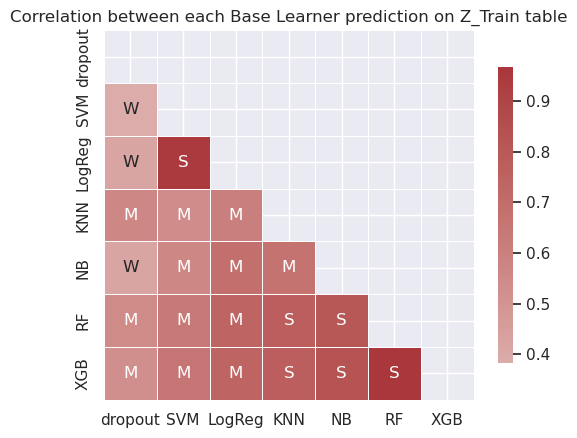

(GPU) Creating Z table for Predict Proba results on Test set...

SVM INFERENCE TIME IS 0:00:00.004510

LogReg INFERENCE TIME IS 0:00:00.006240

KNN INFERENCE TIME IS 0:00:00.281367

NB INFERENCE TIME IS 0:00:00.011075

RF INFERENCE TIME IS 0:00:00.069916

XGB INFERENCE TIME IS 0:00:00.017741

---TOTAL INFERENCE TIME IS 0:00:00.391615---



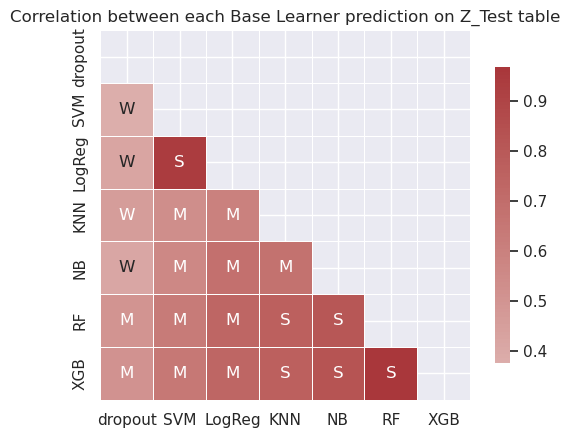

In [914]:
#### >> GENERATE Z MATRIX (PREDICT. of EACH BL)

list_baselearner_name =  ['SVM','LogReg','KNN','NB','RF','XGB']
list_estimators_baselearner_gpu = [svc_gpu, logreg_gpu, knn_gpu, nb_gpu, rf_gpu, xgb_gpu]

Z_train_gpu = generate_Z(list_baselearner_name, list_estimators_baselearner_gpu,
                         np.array(x_train_nooutlier[FEATURES]), np.array(x_train_scaled[FEATURES]), np.array(y_train).ravel().astype('int32'),
                         'Train', 'GPU')

Z_test_gpu = generate_Z(list_baselearner_name, list_estimators_baselearner_gpu,
                        np.array(x_test[FEATURES]), np.array(x_test_scaled[FEATURES]), np.array(y_test).ravel().astype('int32'),
                        'Test', 'GPU')


In [915]:
Z_train_gpu.corr('spearman')

,dropout,SVM,LogReg,KNN,NB,RF,XGB
dropout,1.000000,0.383016,0.421127,0.559285,0.417448,0.546160,0.526978
SVM,0.383016,1.000000,0.944140,0.539089,0.566682,0.640288,0.651589
LogReg,0.421127,0.944140,1.000000,0.608608,0.688381,0.742252,0.744515
KNN,0.559285,0.539089,0.608608,1.000000,0.670728,0.772846,0.774474
NB,0.417448,0.566682,0.688381,0.670728,1.000000,0.807407,0.827949
RF,0.546160,0.640288,0.742252,0.772846,0.807407,1.000000,0.966787
XGB,0.526978,0.651589,0.744515,0.774474,0.827949,0.966787,1.000000


In [916]:
Z_test_gpu.corr('spearman')

,dropout,SVM,LogReg,KNN,NB,RF,XGB
dropout,1.000000,0.376717,0.416733,0.461706,0.412966,0.504544,0.511150
SVM,0.376717,1.000000,0.942997,0.530068,0.559909,0.634073,0.644144
LogReg,0.416733,0.942997,1.000000,0.603565,0.682951,0.737545,0.740017
KNN,0.461706,0.530068,0.603565,1.000000,0.673448,0.765743,0.768470
NB,0.412966,0.559909,0.682951,0.673448,1.000000,0.808898,0.828675
RF,0.504544,0.634073,0.737545,0.765743,0.808898,1.000000,0.967973
XGB,0.511150,0.644144,0.740017,0.768470,0.828675,0.967973,1.000000


Creating Z table on CPU

(CPU) Creating Z table for Predict Proba results on Train set...

SVM INFERENCE TIME IS 0:00:00.100887

LogReg INFERENCE TIME IS 0:00:00.016755

KNN INFERENCE TIME IS 0:00:10.137506

NB INFERENCE TIME IS 0:00:00.052649

RF INFERENCE TIME IS 0:00:00.863149

XGB INFERENCE TIME IS 0:00:00.047406

---TOTAL INFERENCE TIME IS 0:00:11.219405---



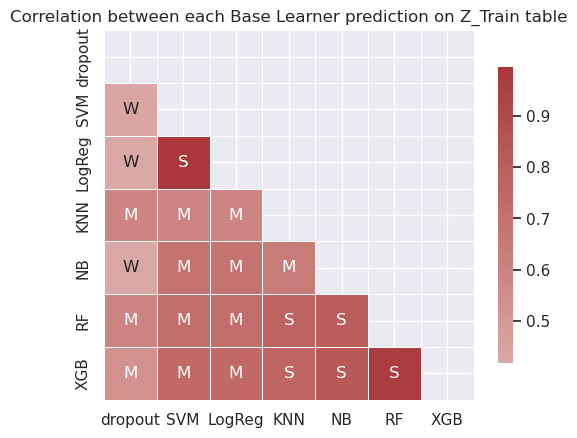

(CPU) Creating Z table for Predict Proba results on Test set...

SVM INFERENCE TIME IS 0:00:00.038831

LogReg INFERENCE TIME IS 0:00:00.009653

KNN INFERENCE TIME IS 0:00:04.414858

NB INFERENCE TIME IS 0:00:00.016793

RF INFERENCE TIME IS 0:00:00.389348

XGB INFERENCE TIME IS 0:00:00.037224

---TOTAL INFERENCE TIME IS 0:00:04.907561---



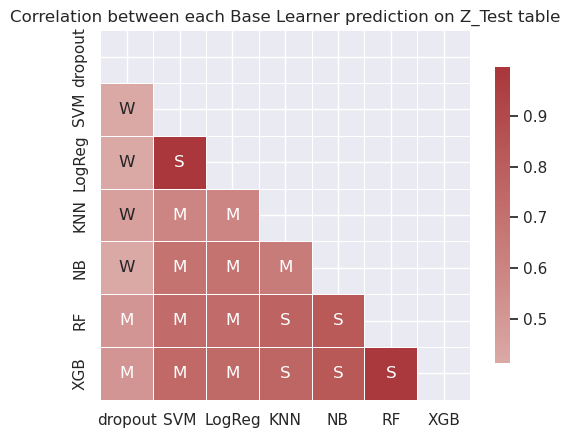

In [933]:
#### >> GENERATE Z MATRIX (PREDICT. of EACH BL)

list_baselearner_name =  ['SVM','LogReg','KNN','NB','RF','XGB']
list_estimators_baselearner_cpu = [svc_cpu, logreg_cpu, knn_cpu, nb_cpu, rf_cpu, xgb_cpu]

Z_train_cpu = generate_Z(list_baselearner_name, list_estimators_baselearner_cpu,
                         np.array(x_train_nooutlier[FEATURES]), np.array(x_train_scaled[FEATURES]), np.array(y_train).ravel().astype('int32'),
                         'Train', 'CPU')

Z_test_cpu = generate_Z(list_baselearner_name, list_estimators_baselearner_cpu,
                        np.array(x_test[FEATURES]), np.array(x_test_scaled[FEATURES]), np.array(y_test).ravel().astype('int32'),
                        'Test', 'CPU')

In [934]:
Z_train_cpu.corr('spearman')

,dropout,SVM,LogReg,KNN,NB,RF,XGB
dropout,1.000000,0.422095,0.421152,0.592747,0.417222,0.593927,0.528757
SVM,0.422095,1.000000,0.996195,0.601096,0.688319,0.722628,0.744788
LogReg,0.421152,0.996195,1.000000,0.600342,0.690172,0.720996,0.742656
KNN,0.592747,0.601096,0.600342,1.000000,0.643216,0.775535,0.764524
NB,0.417222,0.688319,0.690172,0.643216,1.000000,0.804150,0.825620
RF,0.593927,0.722628,0.720996,0.775535,0.804150,1.000000,0.970001
XGB,0.528757,0.744788,0.742656,0.764524,0.825620,0.970001,1.000000


In [935]:
Z_test_cpu.corr('spearman')

,dropout,SVM,LogReg,KNN,NB,RF,XGB
dropout,1.000000,0.418503,0.416799,0.459666,0.412925,0.507741,0.511509
SVM,0.418503,1.000000,0.996048,0.595372,0.684763,0.728403,0.742111
LogReg,0.416799,0.996048,1.000000,0.593256,0.684685,0.725274,0.738545
KNN,0.459666,0.595372,0.593256,1.000000,0.643746,0.770927,0.756291
NB,0.412925,0.684763,0.684685,0.643746,1.000000,0.819364,0.826107
RF,0.507741,0.728403,0.725274,0.770927,0.819364,1.000000,0.981821
XGB,0.511509,0.742111,0.738545,0.756291,0.826107,0.981821,1.000000


(GPU) Super Learner final prediction

In [566]:
from super_learner import *

In [705]:
F1SCORE = 'weighted'

(GPU) SUPER LEARNER RESULTS with 'nnloglik' metalearner ...
* f1scoring=weighted
Train score:
Binomial Residual Deviance = 0.723111643804559
Rank Loss = 0.2471235150176634
F1-Score (weighted) = 0.84632 (with threshold=0.500)

              precision    recall  f1-score   support

           0    0.78432   0.55430   0.64955     38156
           1    0.87017   0.95145   0.90899    119793

    accuracy                        0.85551    157949
   macro avg    0.82724   0.75288   0.77927    157949
weighted avg    0.84943   0.85551   0.84632    157949



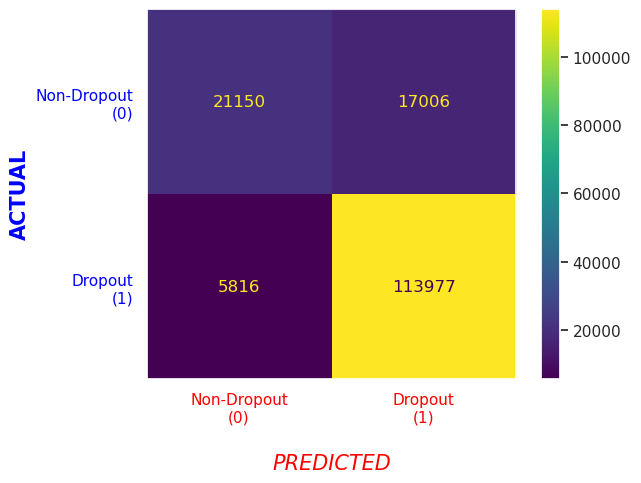

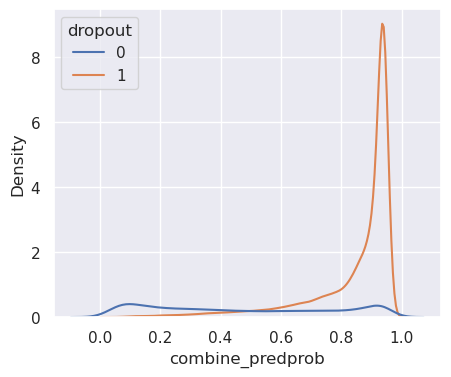

==Train set done in 0:00:07.366114==
Test score:
Binomial Residual Deviance = 0.7637103882089419
Rank Loss = 0.262350100293841
F1-Score (weighted) = 0.83376 (with threshold=0.500)

              precision    recall  f1-score   support

           0    0.74619   0.53305   0.62187     16353
           1    0.86367   0.94225   0.90125     51340

    accuracy                        0.84340     67693
   macro avg    0.80493   0.73765   0.76156     67693
weighted avg    0.83529   0.84340   0.83376     67693



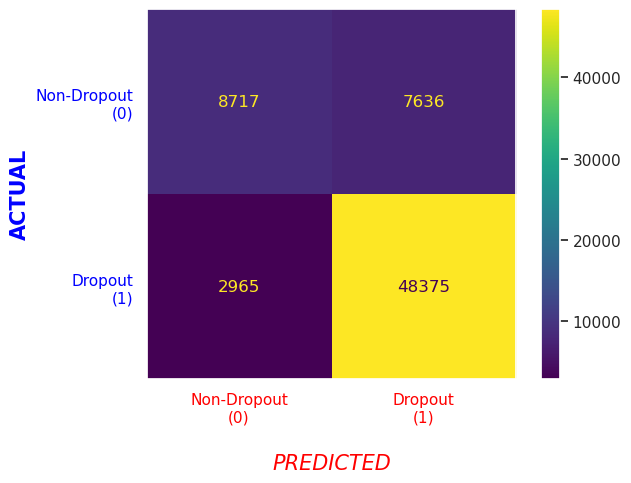

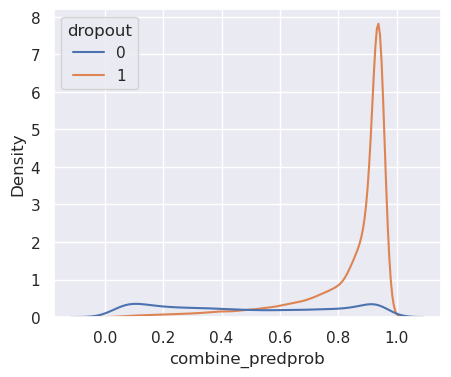

==Test set done in 0:00:03.368049==
---TOTAL EXECUTION TIME: 0:00:10.736323---
(GPU) SUPER LEARNER RESULTS with 'aucmaxim' metalearner ...
* f1scoring=weighted
Train score:
Binomial Residual Deviance = 0.7218681216833956
Rank Loss = 0.24741967106716112
F1-Score (weighted) = 0.84649 (with threshold=0.500)

              precision    recall  f1-score   support

           0    0.78702   0.55281   0.64945     38156
           1    0.86990   0.95235   0.90926    119793

    accuracy                        0.85583    157949
   macro avg    0.82846   0.75258   0.77935    157949
weighted avg    0.84988   0.85583   0.84649    157949



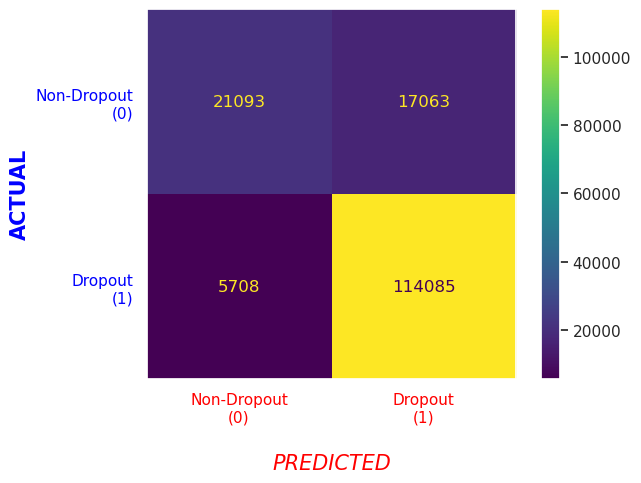

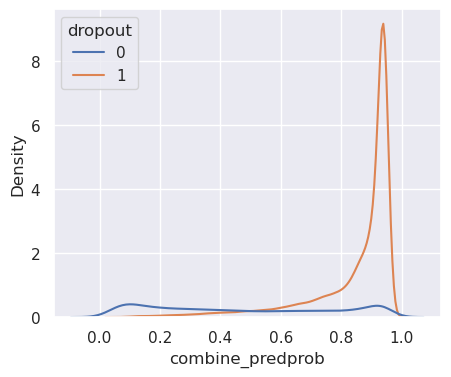

==Train set done in 0:00:01.333456==
Test score:
Binomial Residual Deviance = 0.7637142344789729
Rank Loss = 0.26328071774766837
F1-Score (weighted) = 0.83358 (with threshold=0.500)

              precision    recall  f1-score   support

           0    0.74851   0.53018   0.62070     16353
           1    0.86307   0.94326   0.90139     51340

    accuracy                        0.84347     67693
   macro avg    0.80579   0.73672   0.76105     67693
weighted avg    0.83540   0.84347   0.83358     67693



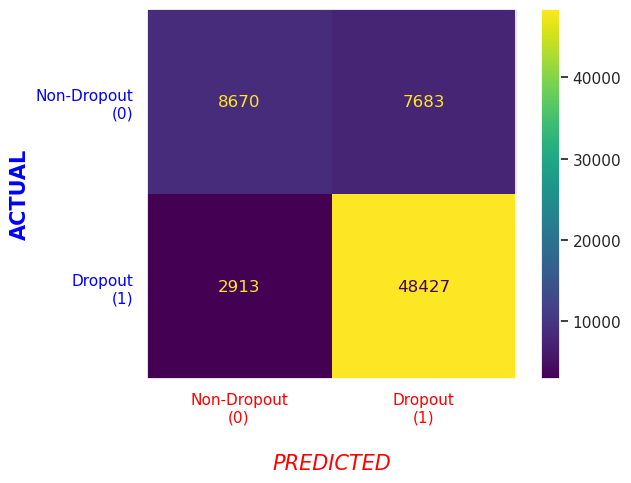

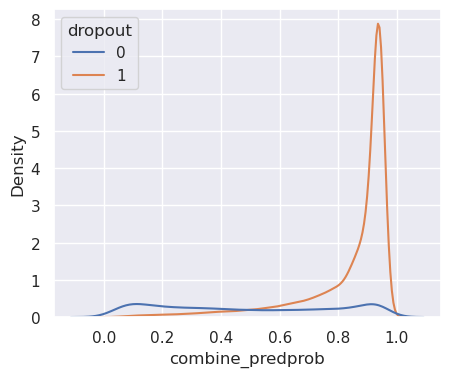

==Test set done in 0:00:00.758109==
---TOTAL EXECUTION TIME: 0:00:02.093958---
CPU times: user 14.7 s, sys: 12.9 s, total: 27.7 s
Wall time: 12.8 s


In [917]:
%%time

#### >> GENERATE SUPER LEARNER prediction

SL_nnloglik_gpu = super_learner('nnloglik', beta_nnloglik_gpu, F1SCORE, Z_train_gpu, Z_test_gpu, 'GPU') #gpu
SL_aucmaxim_gpu = super_learner('aucmaxim', beta_aucmaxim_gpu, F1SCORE, Z_train_gpu, Z_test_gpu, 'GPU')

(CPU) Super Learner final prediction

(CPU) SUPER LEARNER RESULTS with 'nnloglik' metalearner ...
* f1scoring=weighted
Train score:
Binomial Residual Deviance = 0.7132694715329347
Rank Loss = 0.24078394297763328
F1-Score (weighted) = 0.84974 (with threshold=0.500)

              precision    recall  f1-score   support

           0    0.78556   0.56780   0.65916     38156
           1    0.87351   0.95063   0.91044    119793

    accuracy                        0.85815    157949
   macro avg    0.82953   0.75922   0.78480    157949
weighted avg    0.85226   0.85815   0.84974    157949



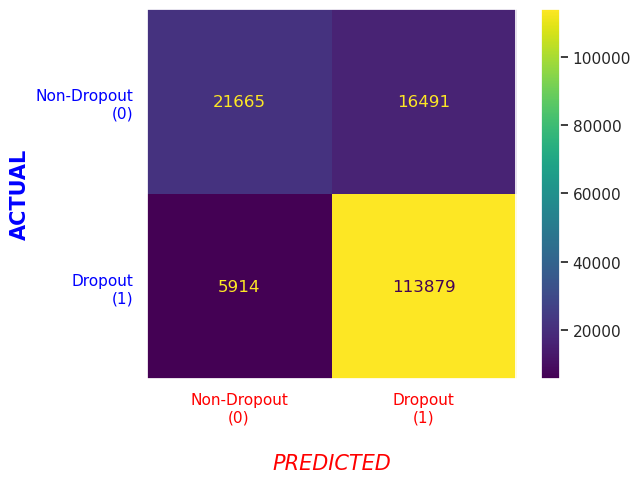

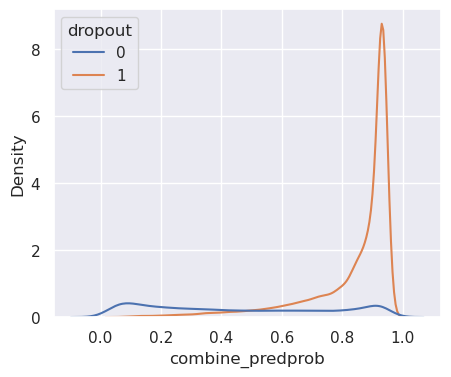

==Train set done in 0:00:07.422092==
Test score:
Binomial Residual Deviance = 0.7644551597507171
Rank Loss = 0.2589992797681824
F1-Score (weighted) = 0.83479 (with threshold=0.500)

              precision    recall  f1-score   support

           0    0.74129   0.54229   0.62636     16353
           1    0.86569   0.93972   0.90119     51340

    accuracy                        0.84371     67693
   macro avg    0.80349   0.74100   0.76377     67693
weighted avg    0.83564   0.84371   0.83479     67693



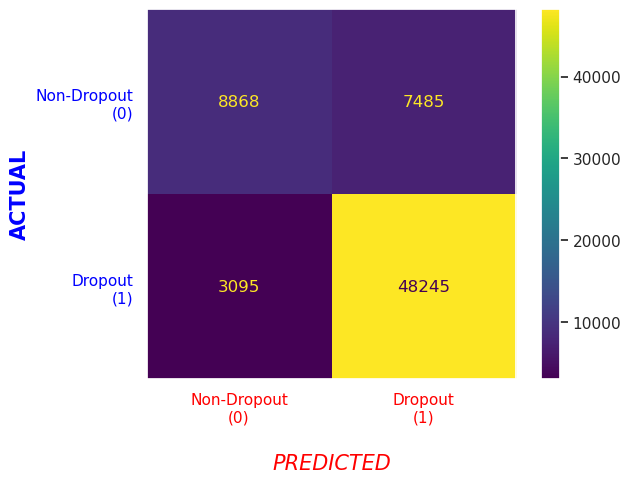

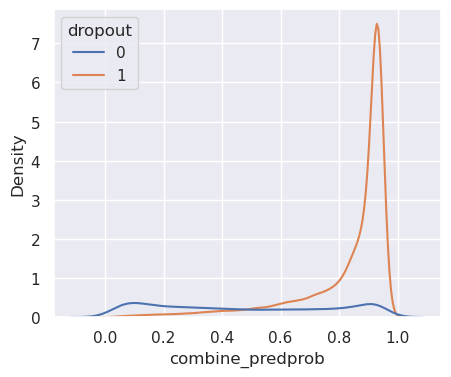

==Test set done in 0:00:03.399660==
---TOTAL EXECUTION TIME: 0:00:10.824906---
(CPU) SUPER LEARNER RESULTS with 'aucmaxim' metalearner ...
* f1scoring=weighted
Train score:
Binomial Residual Deviance = 0.703035110261163
Rank Loss = 0.22227414946459334
F1-Score (weighted) = 0.85929 (with threshold=0.500)

              precision    recall  f1-score   support

           0    0.78732   0.60774   0.68597     38156
           1    0.88352   0.94771   0.91449    119793

    accuracy                        0.86558    157949
   macro avg    0.83542   0.77773   0.80023    157949
weighted avg    0.86028   0.86558   0.85929    157949



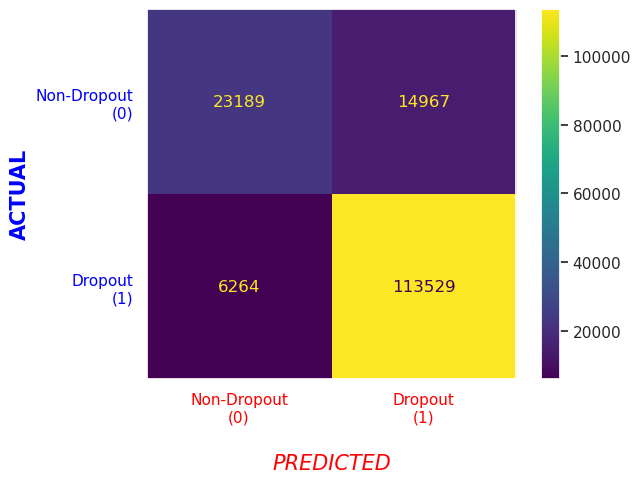

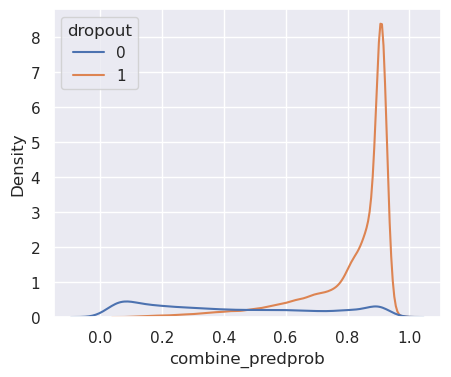

==Train set done in 0:00:01.858681==
Test score:
Binomial Residual Deviance = 0.7748341078057994
Rank Loss = 0.252908499352437
F1-Score (weighted) = 0.83493 (with threshold=0.500)

              precision    recall  f1-score   support

           0    0.72139   0.56351   0.63275     16353
           1    0.87003   0.93068   0.89933     51340

    accuracy                        0.84198     67693
   macro avg    0.79571   0.74709   0.76604     67693
weighted avg    0.83412   0.84198   0.83493     67693



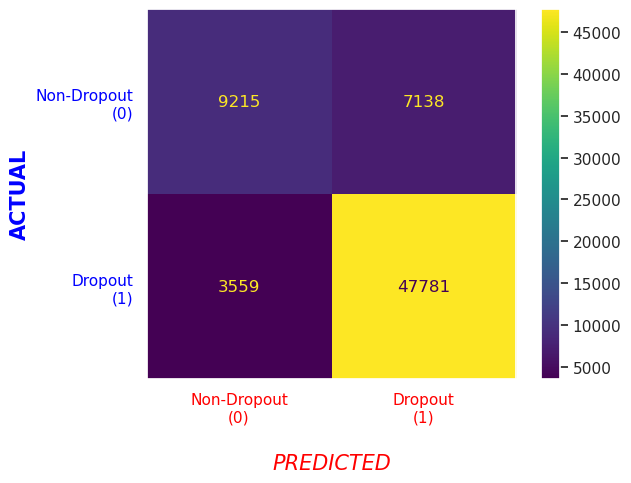

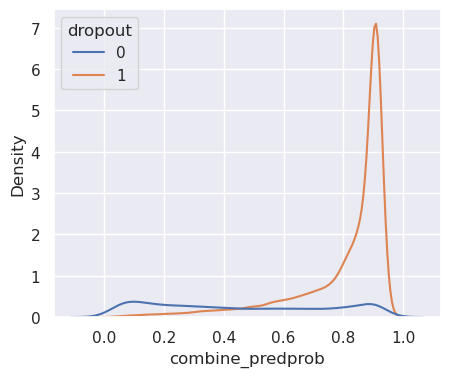

==Test set done in 0:00:00.766626==
---TOTAL EXECUTION TIME: 0:00:02.628460---
CPU times: user 15.1 s, sys: 13.1 s, total: 28.2 s
Wall time: 13.5 s


In [936]:
%%time

#### >> GENERATE SUPER LEARNER prediction

SL_nnloglik_cpu = super_learner('nnloglik', beta_nnloglik_cpu, F1SCORE, Z_train_cpu, Z_test_cpu, 'CPU') #cpu
SL_aucmaxim_cpu = super_learner('aucmaxim', beta_aucmaxim_cpu, F1SCORE, Z_train_cpu, Z_test_cpu, 'CPU')

In [157]:
print('Dumb log loss (Training set):')
print('if all predicted as *0.5*:',
      log_loss(y_train_resampled.ravel(), cp.array([0.5]*len(y_train_resampled)).get()))

Dumb log loss (Training set):
if all predicted as *0.5*: 0.6931471805599451


In [158]:
print('Dumb log loss (Test set):')
print('if all predicted as *0.5*:',
      log_loss(y_test, cp.array([0.5]*len(y_test)).get()))

Dumb log loss (Test set):
if all predicted as *0.5*: 0.6931471805599453


# **Base Learner (trained without cross-val)**

In [159]:
from base_learner_pred import *

In [749]:
F1SCORE = 'weighted'
list_baselearner_name = ['SVM', 'LogReg', 'KNN', 'NB', 'RF', 'XGB']

(GPU) Base learner results

In [881]:
%%time
BL_gpu = base_learner_pred(list_baselearner_name = list_baselearner_name,
                           f1scoring = F1SCORE,
                            Z_train = Z_train_gpu, Z_test = Z_test_gpu,
                            cpu_or_gpu = 'GPU')

(GPU) BASE LEARNER RESULTS ...
* f1scoring=weighted
Train score of SVM:
F1-Score (weighted) = 0.76634 

Test score of SVM:
F1-Score (weighted) = 0.76306 

Train score of LogReg:
F1-Score (weighted) = 0.77464 

Test score of LogReg:
F1-Score (weighted) = 0.77358 

Train score of KNN:
F1-Score (weighted) = 0.83961 

Test score of KNN:
F1-Score (weighted) = 0.81330 

Train score of NB:
F1-Score (weighted) = 0.75101 

Test score of NB:
F1-Score (weighted) = 0.74792 

Train score of RF:
F1-Score (weighted) = 0.86683 

Test score of RF:
F1-Score (weighted) = 0.82848 

Train score of XGB:
F1-Score (weighted) = 0.84226 

Test score of XGB:
F1-Score (weighted) = 0.83338 

BEST BASE LEARNER:
XGB 

Train score report:
              precision    recall  f1-score   support

           0    0.77379   0.54586   0.64014     38156
           1    0.86776   0.94917   0.90664    119793

    accuracy                        0.85174    157949
   macro avg    0.82077   0.74752   0.77339    157949
weighted av

(CPU) Base learner results

In [937]:
%%time
BL_cpu = base_learner_pred(list_baselearner_name = list_baselearner_name,
                            f1scoring = F1SCORE,
                            Z_train = Z_train_cpu, Z_test = Z_test_cpu,
                            cpu_or_gpu = 'CPU')

(CPU) BASE LEARNER RESULTS ...
* f1scoring=weighted
Train score of SVM:
F1-Score (weighted) = 0.77777 

Test score of SVM:
F1-Score (weighted) = 0.77695 

Train score of LogReg:
F1-Score (weighted) = 0.77454 

Test score of LogReg:
F1-Score (weighted) = 0.77355 

Train score of KNN:
F1-Score (weighted) = 0.83986 

Test score of KNN:
F1-Score (weighted) = 0.81330 

Train score of NB:
F1-Score (weighted) = 0.75102 

Test score of NB:
F1-Score (weighted) = 0.74793 

Train score of RF:
F1-Score (weighted) = 0.88105 

Test score of RF:
F1-Score (weighted) = 0.82090 

Train score of XGB:
F1-Score (weighted) = 0.84307 

Test score of XGB:
F1-Score (weighted) = 0.83358 

BEST BASE LEARNER:
XGB 

Train score report:
              precision    recall  f1-score   support

           0    0.77852   0.54537   0.64141     38156
           1    0.86780   0.95058   0.90731    119793

    accuracy                        0.85269    157949
   macro avg    0.82316   0.74797   0.77436    157949
weighted av

# **Stacked Generalization**

In [162]:
from stacked_generalization_pred import *

In [752]:
RANDOM_STATE = 42
F1SCORE = 'weighted'
list_metalearner_name = ['SVM', 'LogReg', 'KNN', 'NB', 'RF', 'XGB']

Stacked Generalization on GPU

In [882]:
%%time
svc_meta_gpu = cl_LinearSVC(probability=True)
logreg_meta_gpu = cl_LogisticRegression()
knn_meta_gpu = cl_KNeighborsClassifier()
nb_meta_gpu = cl_GaussianNB()
rf_meta_gpu = cl_RandomForestClassifier(random_state=RANDOM_STATE)
xgb_meta_gpu = XGBClassifier(gpu_id=0, tree_method='gpu_hist', max_bin=256, random_state=RANDOM_STATE)

list_metalearner_estimator_gpu = [svc_meta_gpu, logreg_meta_gpu, knn_meta_gpu, nb_meta_gpu, rf_meta_gpu, xgb_meta_gpu]

SG_gpu = stacked_generalization_pred(list_metalearner_name,
                                     list_metalearner_estimator_gpu,
                                     f1scoring = F1SCORE,
                                     Z_train_crossval = Z_crossvaltrain_for_building_metalearner_gpu,
                                     Z_train = Z_train_gpu, Z_test = Z_test_gpu,
                                     cpu_or_gpu='GPU')

(GPU) STACKED GENERALIZATION RESULTS ...
* f1scoring=weighted
Train score of SG-SVM:
F1-Score (weighted) = 0.85391 



/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


Test score of SG-SVM:
F1-Score (weighted) = 0.83191 

Train score of SG-LogReg:
F1-Score (weighted) = 0.84937 

Test score of SG-LogReg:
F1-Score (weighted) = 0.83388 

Train score of SG-KNN:
F1-Score (weighted) = 0.83555 

Test score of SG-KNN:
F1-Score (weighted) = 0.81708 

Train score of SG-NB:
F1-Score (weighted) = 0.83506 

Test score of SG-NB:
F1-Score (weighted) = 0.81952 



/home/riset/miniconda3/envs/rapids-23.06/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Train score of SG-RF:
F1-Score (weighted) = 0.84882 

Test score of SG-RF:
F1-Score (weighted) = 0.83040 

Train score of SG-XGB:
F1-Score (weighted) = 0.84967 

Test score of SG-XGB:
F1-Score (weighted) = 0.83162 

BEST METALEARNER for STACKED GENERALIZATION:
LogReg 

Train score report:
              precision    recall  f1-score   support

           0    0.79123   0.56148   0.65685     38156
           1    0.87215   0.95281   0.91070    119793

    accuracy                        0.85828    157949
   macro avg    0.83169   0.75715   0.78377    157949
weighted avg    0.85260   0.85828   0.84937    157949


Test score report:
              precision    recall  f1-score   support

           0    0.74537   0.53434   0.62245     16353
           1    0.86394   0.94186   0.90122     51340

    accuracy                        0.84341     67693
   macro avg    0.80466   0.73810   0.76184     67693
weighted avg    0.83530   0.84341   0.83388     67693

---TOTAL EXECUTION TIME: 0:00:04.161

Stacked Generalization on CPU

In [938]:
%%time
svc_meta_cpu = CalibratedClassifierCV(sk_LinearSVC(dual=False, class_weight='balanced', random_state = RANDOM_STATE), n_jobs=-1)
logreg_meta_cpu = sk_LogisticRegression(random_state = RANDOM_STATE, n_jobs=-1)
knn_meta_cpu = sk_KNeighborsClassifier(n_jobs=-1)
nb_meta_cpu = sk_GaussianNB()
rf_meta_cpu = sk_RandomForestClassifier(n_jobs=-1, random_state = RANDOM_STATE)
xgb_meta_cpu = XGBClassifier(n_jobs=-1, random_state = RANDOM_STATE)

list_metalearner_estimator_cpu = [svc_meta_cpu, logreg_meta_cpu, knn_meta_cpu, nb_meta_cpu, rf_meta_cpu, xgb_meta_cpu]

SG_cpu = stacked_generalization_pred(list_metalearner_name,
                                     list_metalearner_estimator_cpu,
                                     f1scoring = F1SCORE,
                                     Z_train_crossval = Z_crossvaltrain_for_building_metalearner_cpu,
                                     Z_train = Z_train_cpu, Z_test = Z_test_cpu,
                                     cpu_or_gpu='CPU')

(CPU) STACKED GENERALIZATION RESULTS ...
* f1scoring=weighted
Train score of SG-SVM:
F1-Score (weighted) = 0.87985 

Test score of SG-SVM:
F1-Score (weighted) = 0.83371 

Train score of SG-LogReg:
F1-Score (weighted) = 0.86683 

Test score of SG-LogReg:
F1-Score (weighted) = 0.83496 

Train score of SG-KNN:
F1-Score (weighted) = 0.83903 

Test score of SG-KNN:
F1-Score (weighted) = 0.81605 

Train score of SG-NB:
F1-Score (weighted) = 0.83980 

Test score of SG-NB:
F1-Score (weighted) = 0.81800 

Train score of SG-RF:
F1-Score (weighted) = 0.85670 

Test score of SG-RF:
F1-Score (weighted) = 0.82949 

Train score of SG-XGB:
F1-Score (weighted) = 0.85732 

Test score of SG-XGB:
F1-Score (weighted) = 0.83180 

BEST METALEARNER for STACKED GENERALIZATION:
LogReg 

Train score report:
              precision    recall  f1-score   support

           0    0.82793   0.60428   0.69864     38156
           1    0.88394   0.96000   0.92040    119793

    accuracy                        0.87407 

# **Summary: Model Performance Report**

In [883]:
allreport = np.array(SL_nnloglik_gpu  + SL_aucmaxim_gpu
                      + BL_gpu 
                      + SG_gpu 
                    )

In [ ]:
# allreport = np.array(SL_nnloglik_cpu  + SL_aucmaxim_cpu
#                       + BL_cpu 
#                       + SG_cpu 
#                     )

In [896]:
table_report = cf.DataFrame(dict(zip(['model','metalearner','CPU_or_GPU',
                                    'f1scoring_type',
                                    'f1score_train','f1score_train_class1','f1score_train_class0',
                                    'f1score_test','f1score_test_class1','f1score_test_class0'],
                                    [allreport.T[i] for i in range(len(allreport[0]))]
                                    )))
table_report['dataset'] = "xuetangx"
table_report['balancing_technique'] = "N/A"
table_report['random_state'] = RANDOM_STATE
table_report['outlier_std_thresh'] = OUTLIER_STD_THRESH
table_report['outlier_std_thresh_weeklydiff'] = OUTLIER_STD_THRESH_WEEKLYDIFF
table_report['kfold'] = KFOLD
table_report['train_size'] = TRAIN_SIZE
table_report['scaler'] = "minmaxscaler"
table_report['hyperparamtune'] = HYPERPARAMTUNE_MODE
table_report['features'] = str(list(x_train.columns))
table_report = table_report[['dataset','model','metalearner',
                            'CPU_or_GPU','balancing_technique','random_state','outlier_std_thresh','outlier_std_thresh_weeklydiff',
                            'kfold','train_size','scaler','hyperparamtune','features','f1scoring_type',
                            'f1score_train','f1score_train_class1','f1score_train_class0',
                            'f1score_test','f1score_test_class1','f1score_test_class0']]

In [897]:
table_report.to_csv('xuetangx_nobalancing_0.7_minmaxscaler_tablereport.csv')

In [887]:
x_train.to_csv('x_train.csv')

In [888]:
pd.DataFrame({'dropout':y_train}).to_csv('y_train.csv')

In [889]:
x_test.to_csv('x_test.csv')

In [890]:
pd.DataFrame({'dropout':y_test}).to_csv('y_test.csv')

In [891]:
pd.options.display.max_rows = 15

In [901]:
table_report[['model','metalearner','f1score_test_class1']].sort_values('f1score_test_class1', ascending=False).to_pandas().query('metalearner!=\'f1maxim\'')

,model,metalearner,f1score_test_class1
1,Super Learner,aucmaxim,0.9013866914844113
0,Super Learner,nnloglik,0.9012575687005123
7,XGB,,0.9012333038581468
9,Stacked Generalization,LogReg,0.9012207622775137
8,Stacked Generalization,SVM,0.9000149120190873
13,Stacked Generalization,XGB,0.8996997333034932
12,Stacked Generalization,RF,0.8993771007718736
6,RF,,0.8983891530723345
4,KNN,,0.8902313409983017
10,Stacked Generalization,KNN,0.8886276427657813


In [ ]:
# !zip -r final_result_update.zip final_result_update